In [1]:
import numpy as np
import matplotlib.pyplot as plt
import composite
%matplotlib inline
from numpy import trapz
import copy
import glob as glob
from numpy import trapz
from astropy.time import Time
from scipy import interpolate
import spectral_analysis as sa
import sqlite3 as sq3
import kaepora as kpora
import kaepora_plot as kplot
import add_new_columns as anc
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, MaxNLocator

In [2]:
%load_ext autoreload
%autoreload 2

# 1.0 < dm15 < 1.3 -- low/med/high v -- time series

In [33]:
query_strings_highv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)"]
max_phase = 71.
p1 = -10.
k = 3.
#p2 = p1+k
while p1 < max_phase:
    if 32 >= p1 > 20.:
        k = 6.
    if p1 >32:
        k = 9.
    p2 = p1+k
    #p2 += k
    
    #print (p1,p2)
    query_strings_highv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)"% (p1,p2))
    p1 += k

        
for q in query_strings_highv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)
SELECT * from Spectra inner

In [34]:
query_strings_lowv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)"]
max_phase = 71.
p1 = -10.
k = 3.
#p2 = p1+k
while p1 < max_phase:
    if 32 >= p1 > 20.:
        k = 6.
    if p1 >32:
        k = 9.
    p2 = p1+k
    #p2 += k
    
    #print (p1,p2)
    query_strings_lowv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)"% (p1,p2))
    p1 += k

        
for q in query_strings_lowv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and ph

In [39]:
query_strings_midv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)"]
max_phase = 71.
p1 = -10.
k = 3.
#p2 = p1+k
while p1 < max_phase:
    if 32 >= p1 > 20.:
        k = 6.
    if p1 >32:
        k = 9.
    p2 = p1+k
    #p2 += k
    
    #print (p1,p2)
    query_strings_midv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)"% (p1,p2))
    p1 += k

        
for q in query_strings_midv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)
SELECT * from Spectra inner

In [52]:
composites_lowv, sn_arrays_lowv, boot_sn_arrays_lowv = kpora.make_composite(query_strings_lowv, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)
25 Total Spectra found
0 flagged spectra removed 25 spectra left
0 spectra of peculiar Ias removed 25 spectra left
25 spectra of SNe that have host reddening corrections
Arrays cleaned
25 spectra may have telluric contamination
5 total SNe
removed spectra of SNe with A_V > 2.0
Using 25 spectra of 5 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)
34 Total Spectra found
3 flagged spectra removed 31 spectra left
0 spectra of peculiar Ias removed 31 spectra left
31 spectr

11 total SNe
removed spectra of SNe with A_V > 2.0
Using 14 spectra of 10 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23.000000 and phase < 29.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 > -10500)
32 Total Spectra found
1 flagged spectra removed 31 spectra left
0 spectra of peculiar Ias removed 31 spectra left
31 spectra of SNe that have host reddening corrections
Arrays cleaned
31 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0
Using 28 spectra of 12 SNe
Gini balancing...
Balanced after 10 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 35.000000 and ((dm15_source >= 1.0 an

In [53]:
composites_highv, sn_arrays_highv, boot_sn_arrays_highv = kpora.make_composite(query_strings_highv, boot=True, medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)
17 Total Spectra found
0 flagged spectra removed 17 spectra left
0 spectra of peculiar Ias removed 17 spectra left
17 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
5 total SNe
removed spectra of SNe with A_V > 2.0
Using 15 spectra of 4 SNe
Gini balancing...
Balanced after 3 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)
25 Total Spectra found
0 flagged spectra removed 25 spectra left
0 spectra of peculiar Ias 

25 Total Spectra found
0 flagged spectra removed 25 spectra left
0 spectra of peculiar Ias removed 25 spectra left
25 spectra of SNe that have host reddening corrections
Arrays cleaned
25 spectra may have telluric contamination
19 total SNe
removed spectra of SNe with A_V > 2.0
Using 25 spectra of 19 SNe
Gini balancing...
Balanced after 6 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23.000000 and phase < 29.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -30000 and -12000)
53 Total Spectra found
0 flagged spectra removed 53 spectra left
0 spectra of peculiar Ias removed 53 spectra left
53 spectra of SNe that have host reddening corrections
Arrays cleaned
53 spectra may have telluric contamination
29 total SNe
removed spectra of SNe with A_V > 2.0
Using 44 spectra of 26 SNe
Gini balancing..

In [54]:
composites_midv, sn_arrays_midv, boot_sn_arrays_midv = kpora.make_composite(query_strings_midv, boot=True, medmean=1, verbose=False, fakeactionse = True, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)
10 Total Spectra found
1 flagged spectra removed 9 spectra left
0 spectra of peculiar Ias removed 9 spectra left
9 spectra of SNe that have host reddening corrections
Arrays cleaned
9 spectra may have telluric contamination
6 total SNe
removed spectra of SNe with A_V > 2.0
Using 9 spectra of 6 SNe
Gini balancing...
Balanced after 4 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)
16 Total Spectra found
0 flagged spectra removed 16 spectra left
0 spectra of peculiar Ias remo

17 Total Spectra found
0 flagged spectra removed 17 spectra left
0 spectra of peculiar Ias removed 17 spectra left
17 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
10 total SNe
removed spectra of SNe with A_V > 2.0
Using 17 spectra of 10 SNe
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 23.000000 and phase < 29.000000 and ((dm15_source >= 1.0 and dm15_source < 1.3) or (dm15_from_fits >= 1.0 and dm15_from_fits < 1.3)) and (si_v0 between -12000 and -10500)
32 Total Spectra found
0 flagged spectra removed 32 spectra left
0 spectra of peculiar Ias removed 32 spectra left
32 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
23 total SNe
removed spectra of SNe with A_V > 2.0
Using 32 spectra of 23 SNe
Gini balancing...


Phase:  -8.437970239569976
dm15:  1.0926835113654967
Redshift:  0.007479590279792859
Morphology:  13.495665086575134
Phase:  -7.977080220386175
dm15:  1.1231174275026665
Redshift:  0.009529921270242117
Morphology:  12.078840166860367
Phase:  -8.23795431653333
dm15:  1.1255316767133638
Redshift:  0.00985370307737712
Morphology:  12.225595068042008


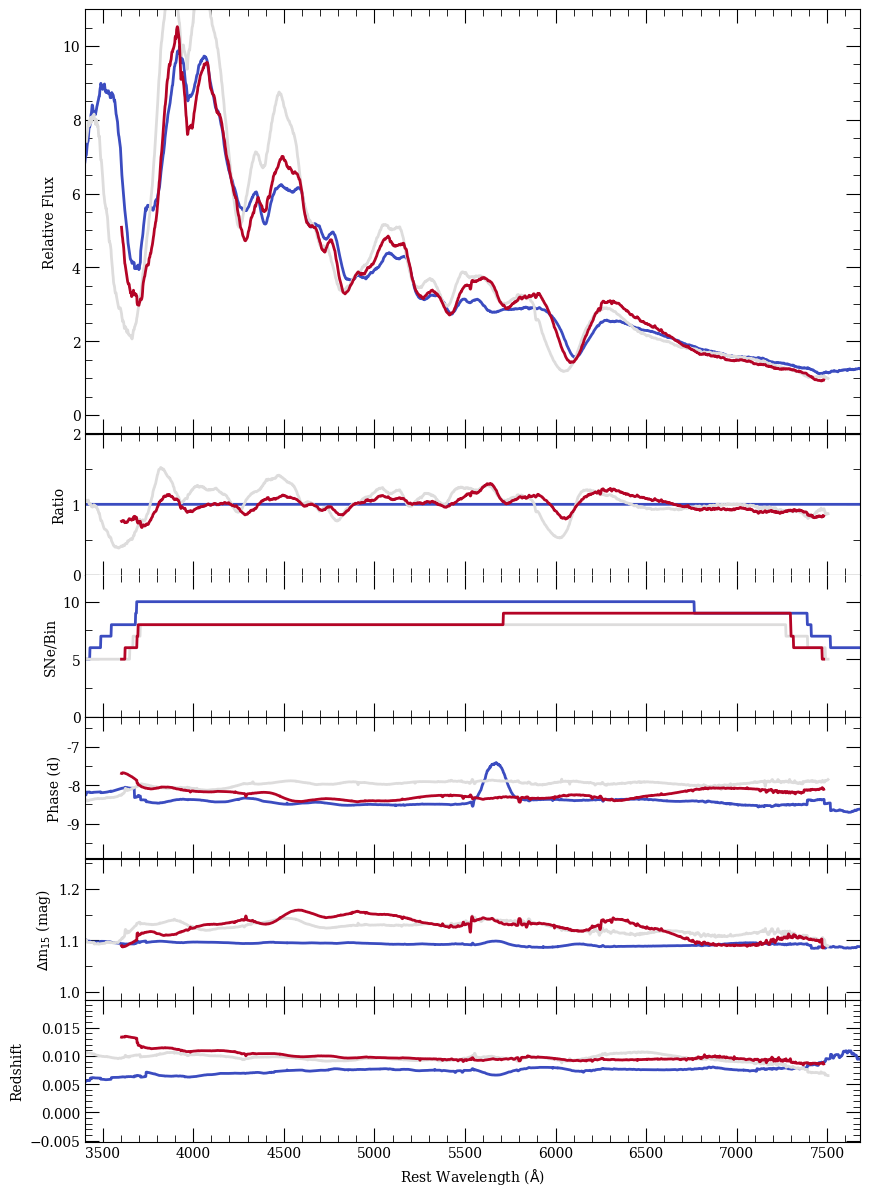

Phase:  -5.7229458632135595
dm15:  1.1051619561729171
Redshift:  0.013391289461393745
Morphology:  11.23915603720021
Phase:  -5.55569853872567
dm15:  1.1075683707591373
Redshift:  0.014179248294066842
Morphology:  12.612385862571971
Phase:  -5.037770274240999
dm15:  1.1727913294816374
Redshift:  0.014189248313058265
Morphology:  10.979472184892797


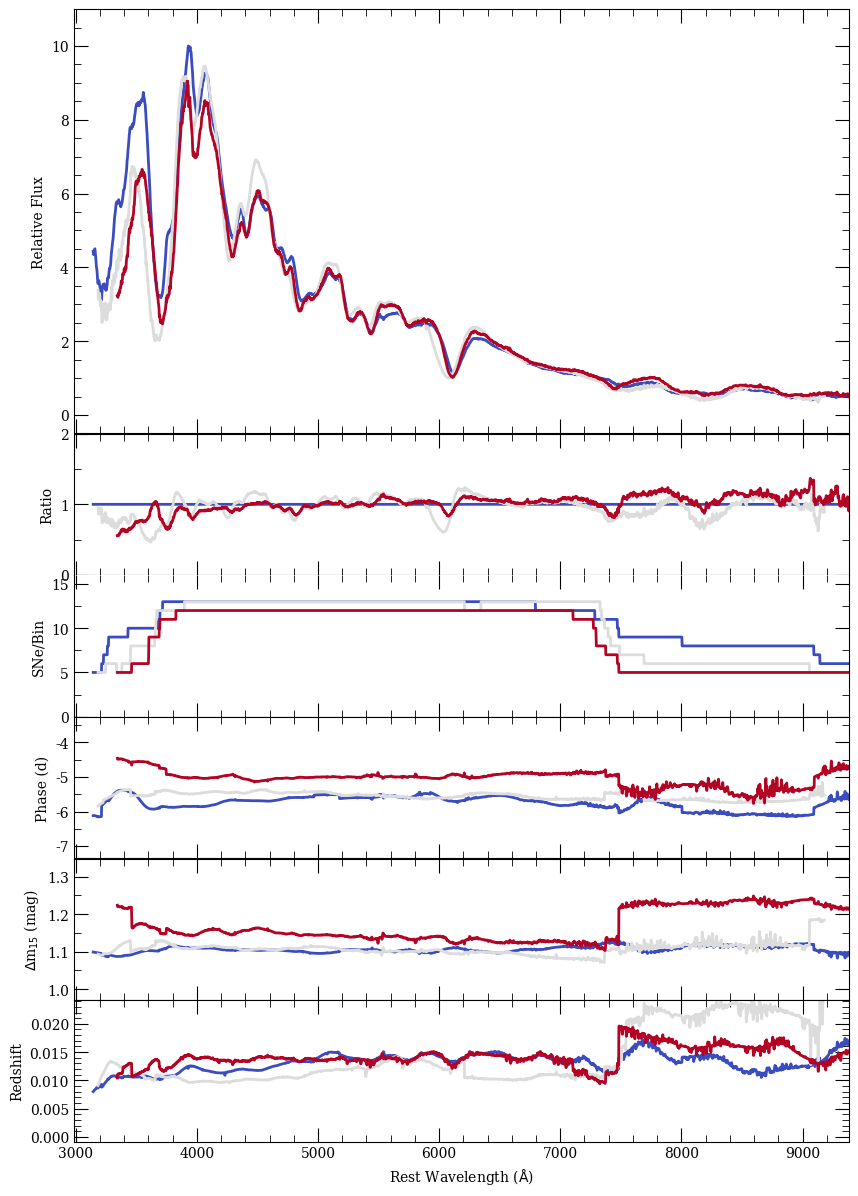

Phase:  -2.2569396791823877
dm15:  1.1045647150114257
Redshift:  0.010448102774160611
Morphology:  11.912002571883901
Phase:  -2.82931180138882
dm15:  1.0817378914416036
Redshift:  0.010093729287082456
Morphology:  13.34507520108596
Phase:  -2.2479568773454925
dm15:  1.1658418516313522
Redshift:  0.017364730148174894
Morphology:  11.383270017087101


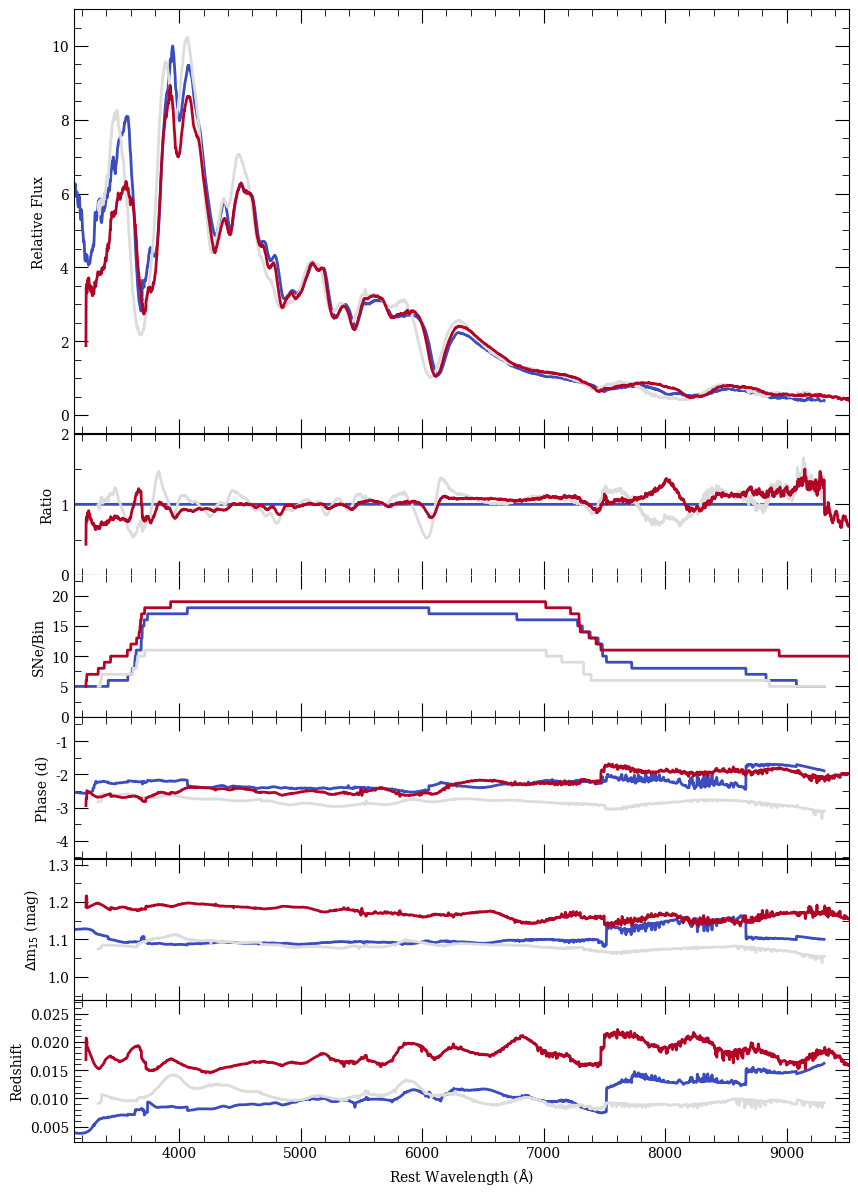

Phase:  0.44547177186761433
dm15:  1.1196430654206375
Redshift:  0.00749052146380833
Morphology:  13.023566587883794
Phase:  -0.04405245058353772
dm15:  1.0895975399219675
Redshift:  0.01535377363418962
Morphology:  12.71485576806973
Phase:  0.5369313531454915
dm15:  1.1720001603532997
Redshift:  0.016433880330630837
Morphology:  10.438212250724789


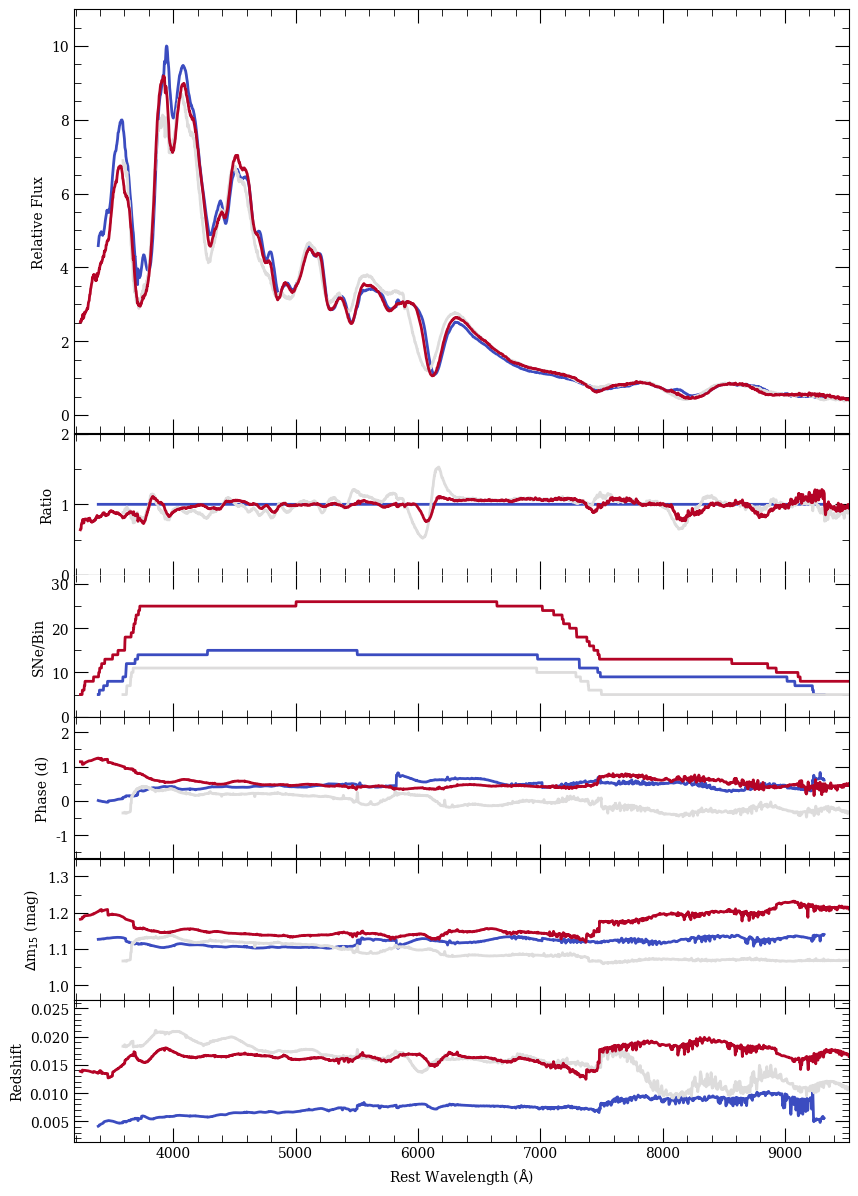

Phase:  3.6126859816352894
dm15:  1.1075695157134895
Redshift:  0.00720658517191743
Morphology:  12.77985517379188
Phase:  3.5795776628191027
dm15:  1.1030457865087984
Redshift:  0.01567922206853278
Morphology:  12.138305846700362
Phase:  3.09166600344521
dm15:  1.142434758093172
Redshift:  0.01396551499510327
Morphology:  11.043455836158065


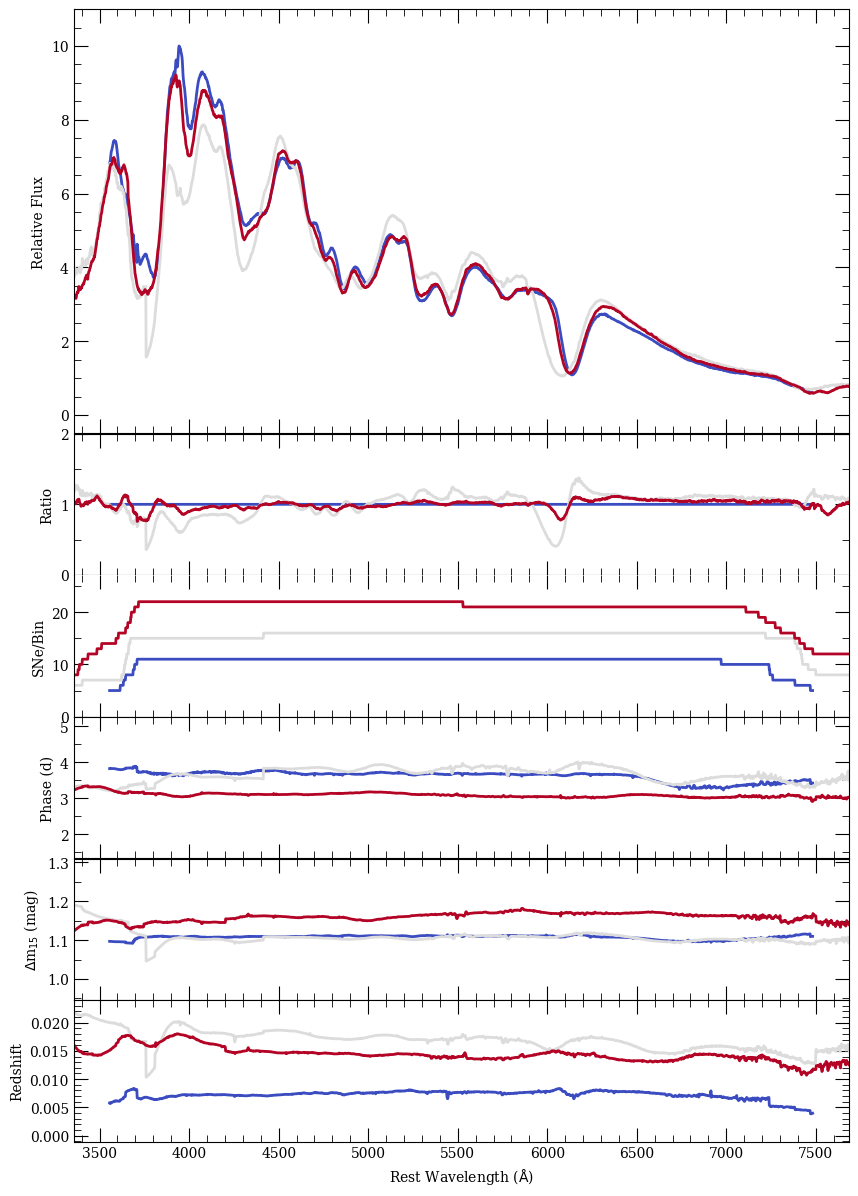

Phase:  6.521416897777581
dm15:  1.1108510859840632
Redshift:  0.007601946889180978
Morphology:  11.846561622120817
Phase:  6.648654796412065
dm15:  1.164925802661812
Redshift:  0.01825008389978005
Morphology:  9.822824452638757
Phase:  6.250071683357218
dm15:  1.098958009854724
Redshift:  0.01565704736205269
Morphology:  11.107465414019261


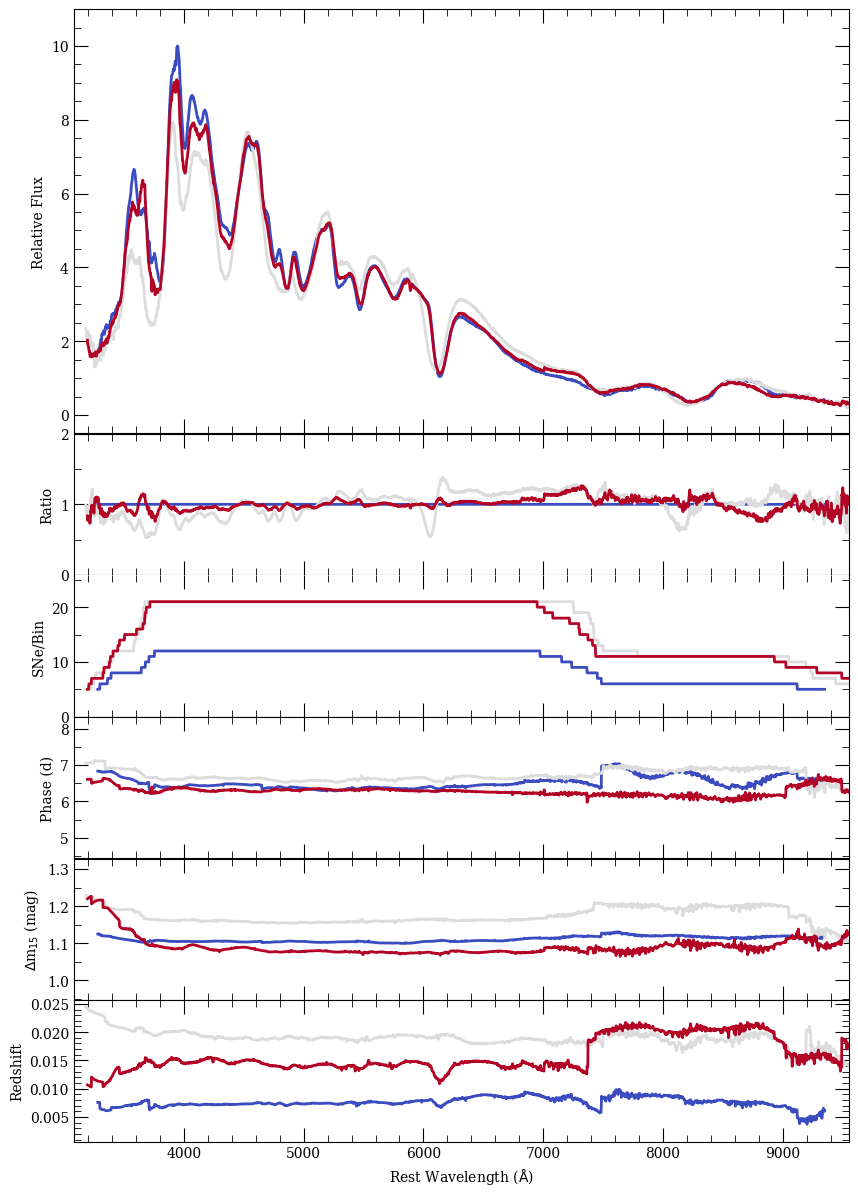

Phase:  9.099043412903411
dm15:  1.0887210344239686
Redshift:  0.00528906162118267
Morphology:  13.143830905641323
Phase:  9.463964205280474
dm15:  1.0945956755623965
Redshift:  0.01670897247821121
Morphology:  12.531274266163138
Phase:  9.375914511575282
dm15:  1.1619773485871483
Redshift:  0.015235910063700486
Morphology:  10.431074942523736


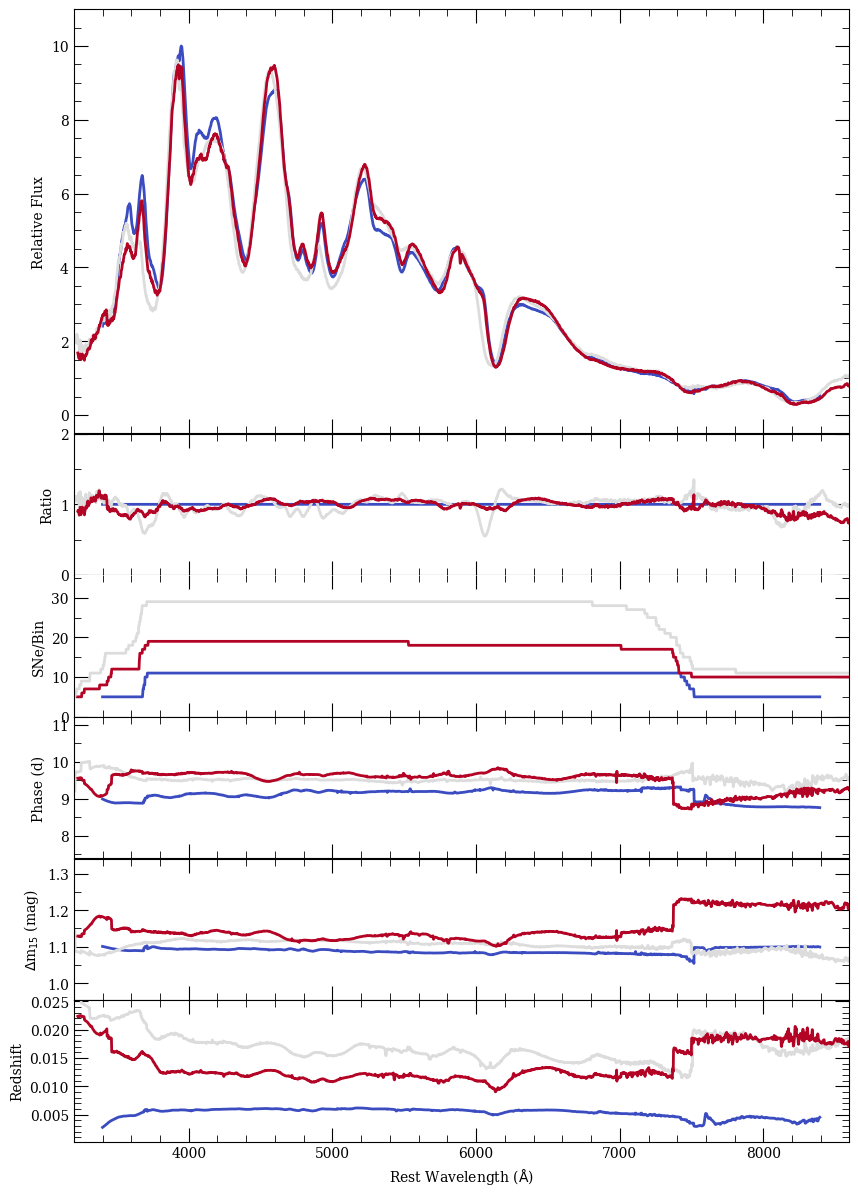

Phase:  12.361740668920229
dm15:  1.0809669722251762
Redshift:  0.0064144501870736234
Morphology:  12.591229416820713
Phase:  12.188784353510934
dm15:  1.1166534507906722
Redshift:  0.019659239936989925
Morphology:  11.524893967050568
Phase:  12.267444056893105
dm15:  1.1230534687607667
Redshift:  0.011866650312022381
Morphology:  11.465632326494426


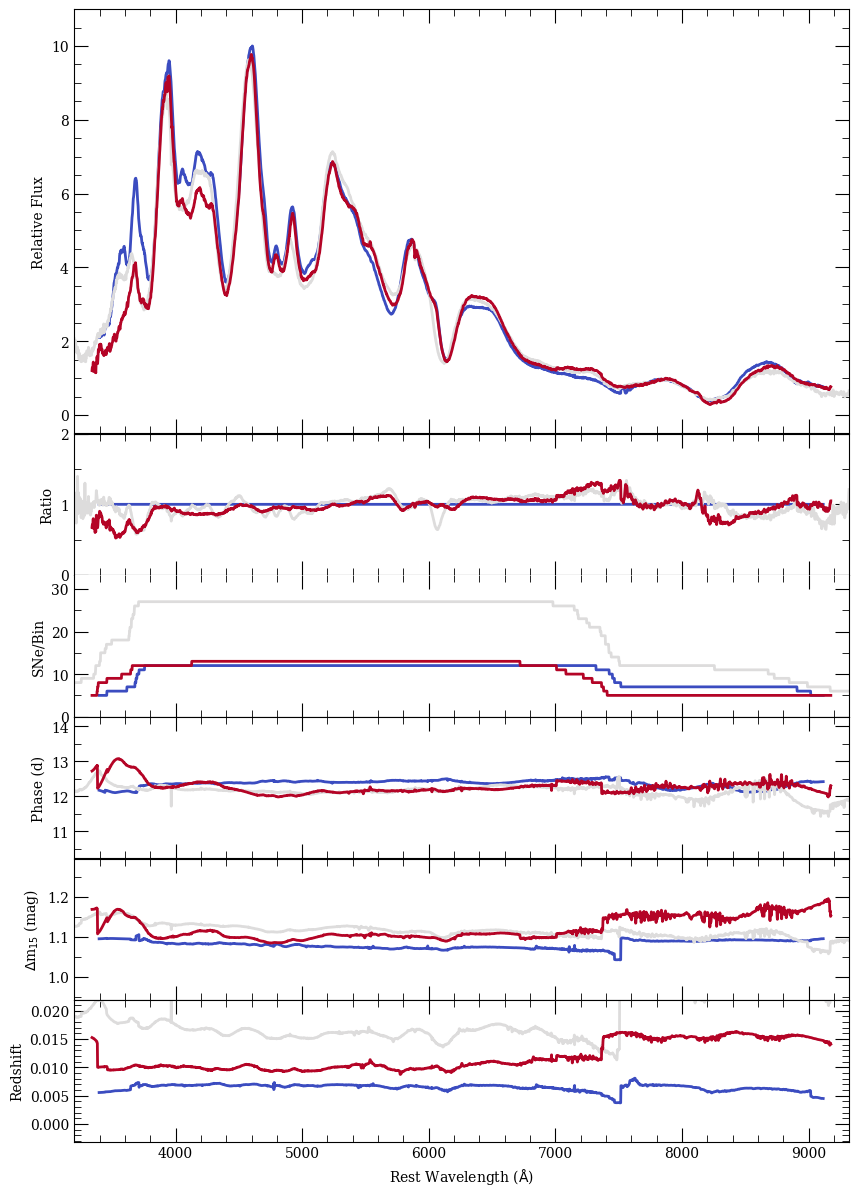

Phase:  15.536859257394935
dm15:  1.0976090595926087
Redshift:  0.009633952987197054
Morphology:  13.568252596986818
Phase:  15.343579372053428
dm15:  1.1277465576996246
Redshift:  0.017009292859808234
Morphology:  11.953009104468238
Phase:  15.109936910604112
dm15:  1.1175628895423457
Redshift:  0.01717866293624693
Morphology:  12.130084412640155


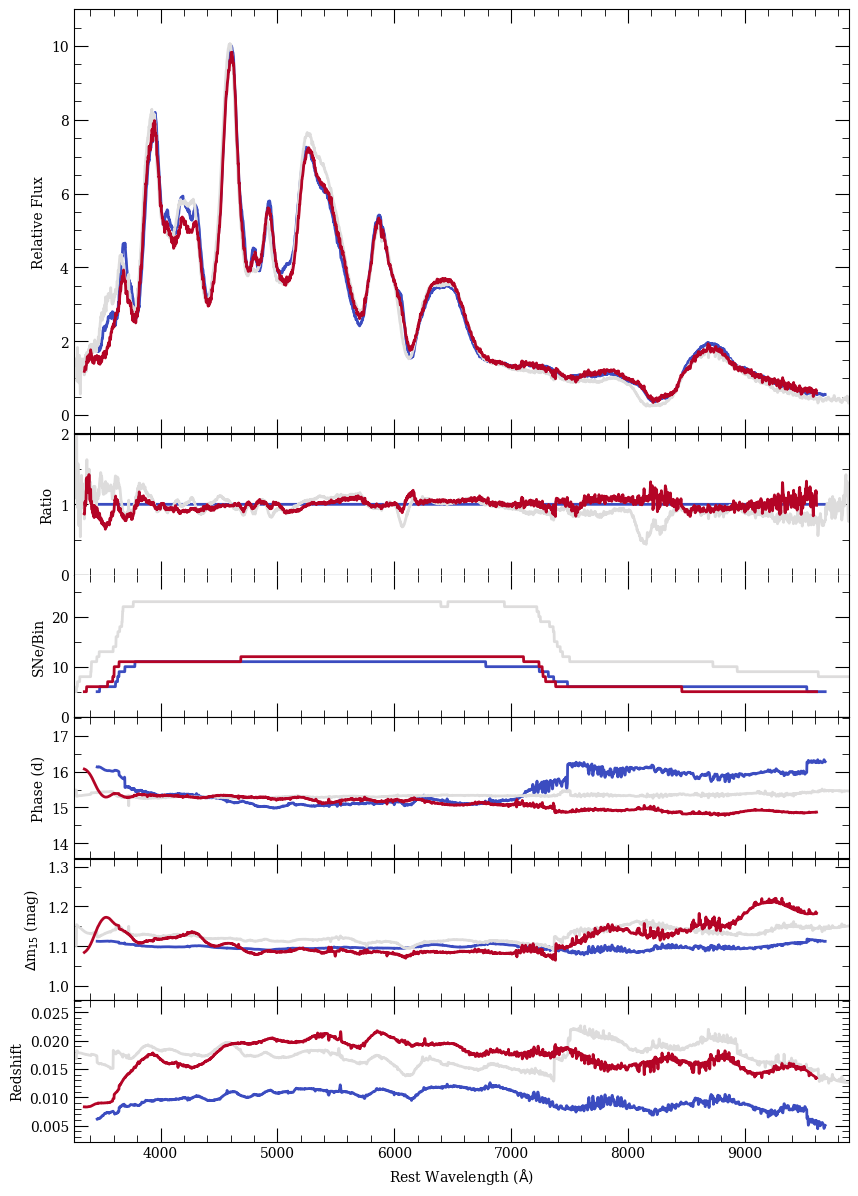

Phase:  18.42895123367931
dm15:  1.1049486247779958
Redshift:  0.005218480625781129
Morphology:  12.604445273655822
Phase:  18.54523861983416
dm15:  1.0829996909158517
Redshift:  0.014345177100546577
Morphology:  12.454046862611445
Phase:  18.687626170090724
dm15:  1.0730499148082144
Redshift:  0.02152191897735281
Morphology:  13.66042250717662


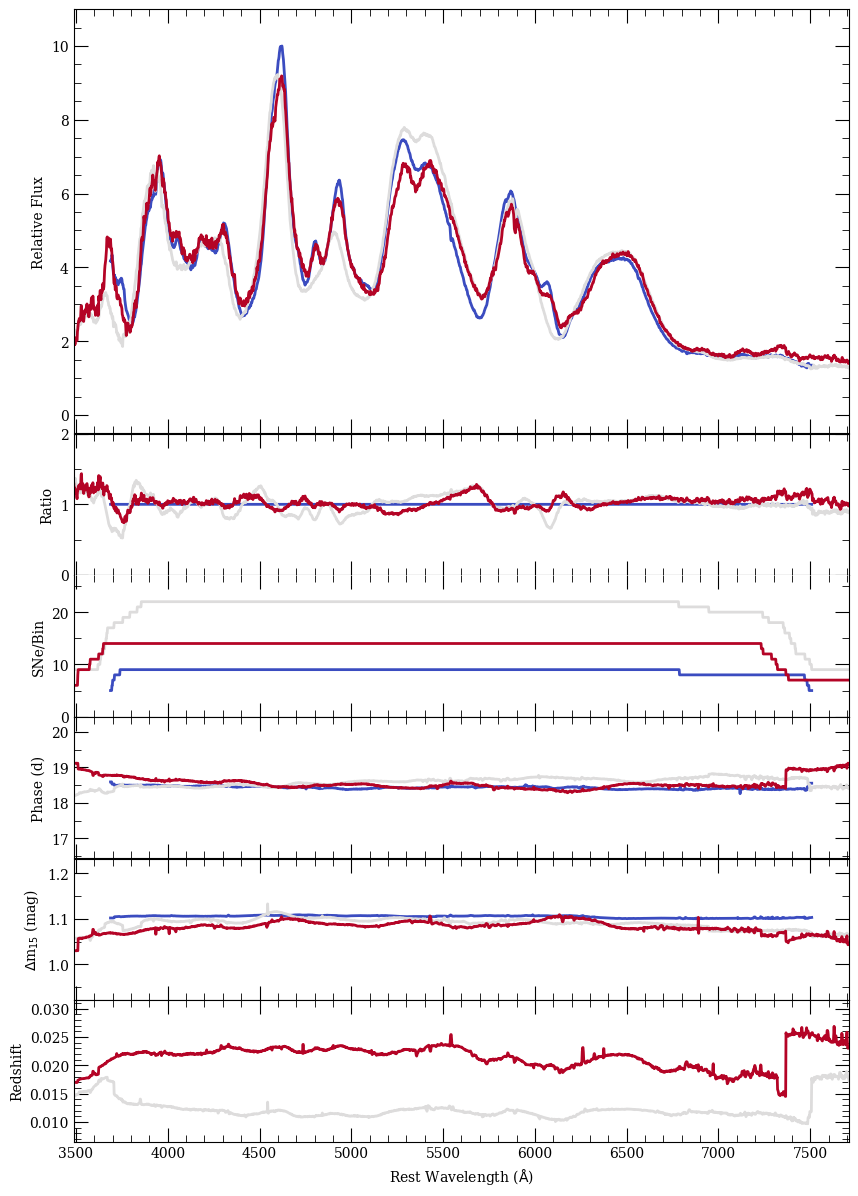

Phase:  20.860765701382686
dm15:  1.0965633328497228
Redshift:  0.006104798334229268
Morphology:  12.972854121558692
Phase:  21.35494460283135
dm15:  1.070274700063918
Redshift:  0.01435276628024833
Morphology:  12.460641808865534
Phase:  21.645815570018737
dm15:  1.156995861760328
Redshift:  0.01649535410141703
Morphology:  11.192879011365752


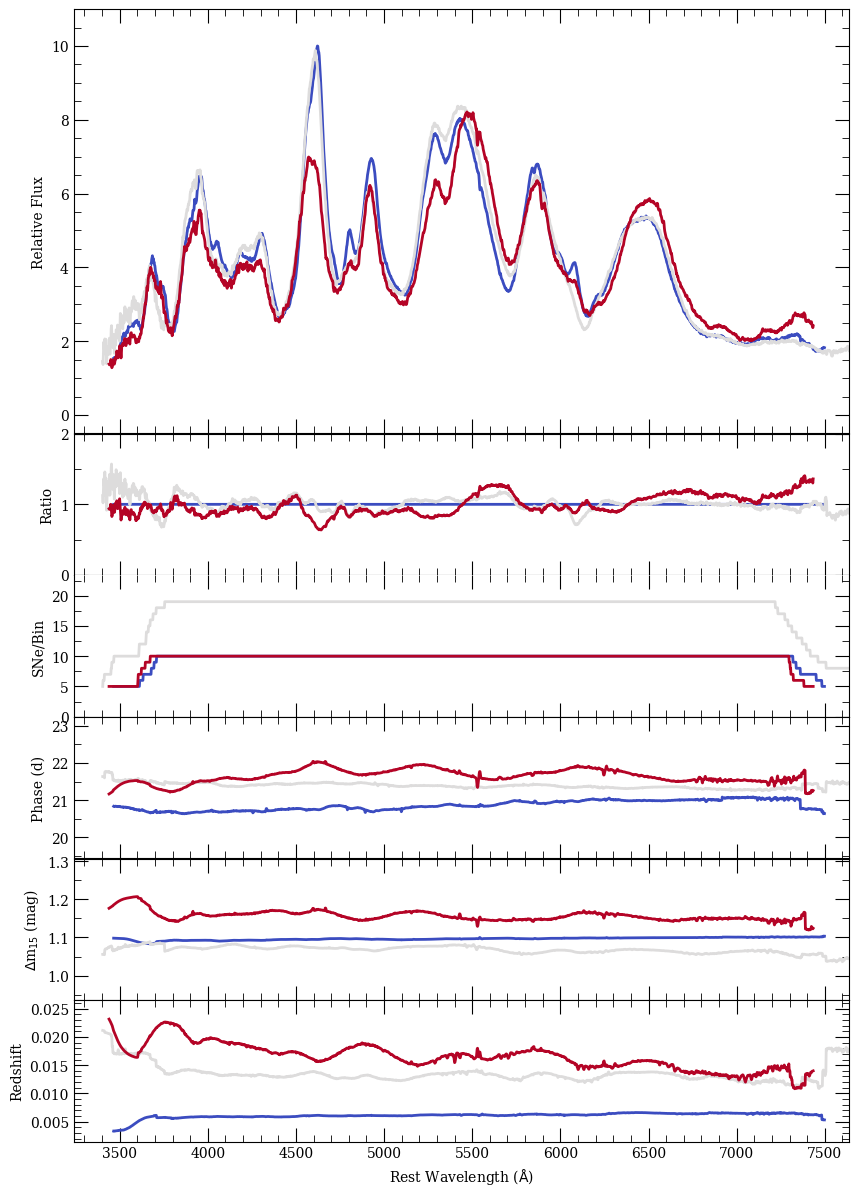

Phase:  25.91061535951709
dm15:  1.1030346558873028
Redshift:  0.009467498411039377
Morphology:  11.428709696849078
Phase:  26.545780682234888
dm15:  1.117001680372058
Redshift:  0.017573318246539155
Morphology:  13.062263600236856
Phase:  26.023747511889887
dm15:  1.175746155089352
Redshift:  0.01733122652213357
Morphology:  10.930888072930667


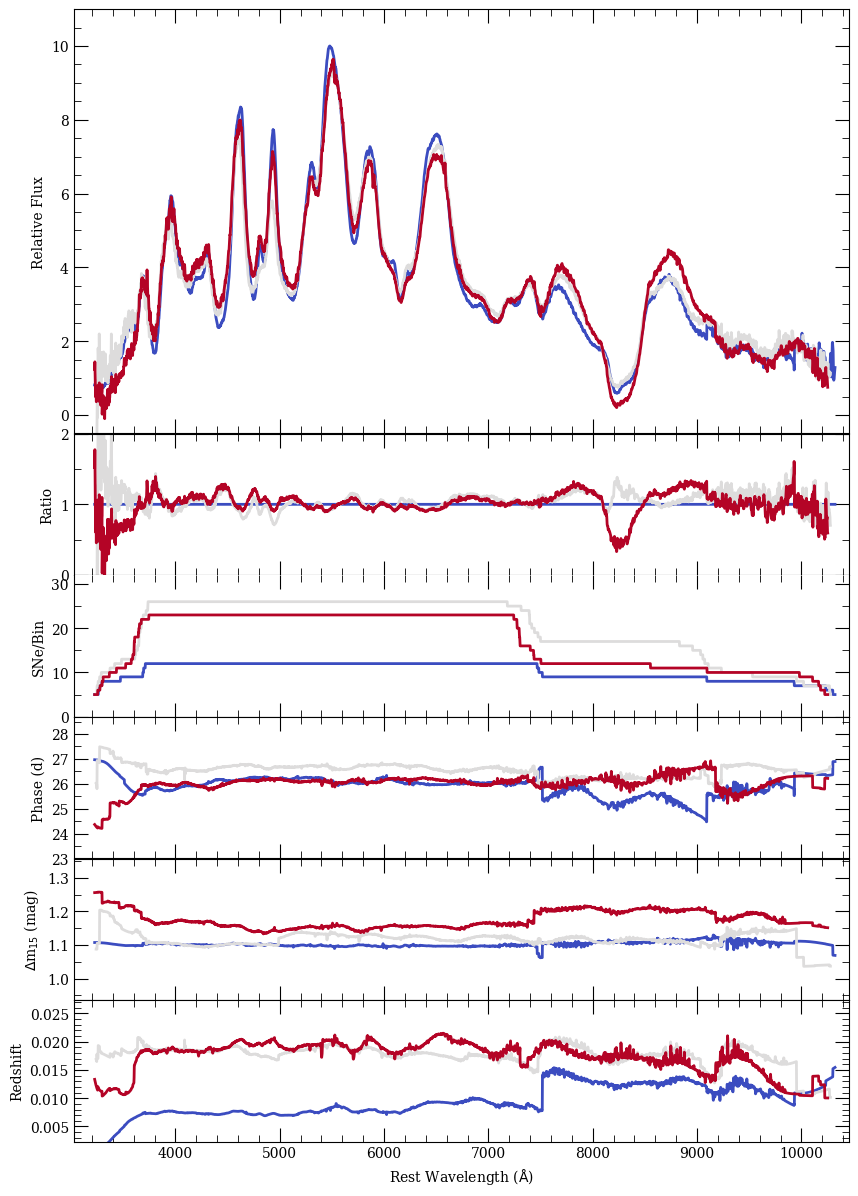

Phase:  31.313038512040528
dm15:  1.0940773044941228
Redshift:  0.007376967421558126
Morphology:  12.553728802715158
Phase:  31.060774681920904
dm15:  1.1360664179947983
Redshift:  0.0177533917170783
Morphology:  10.365990596387693
Phase:  32.21710938469118
dm15:  1.1188740017918823
Redshift:  0.015544076903204017
Morphology:  10.901613158784285


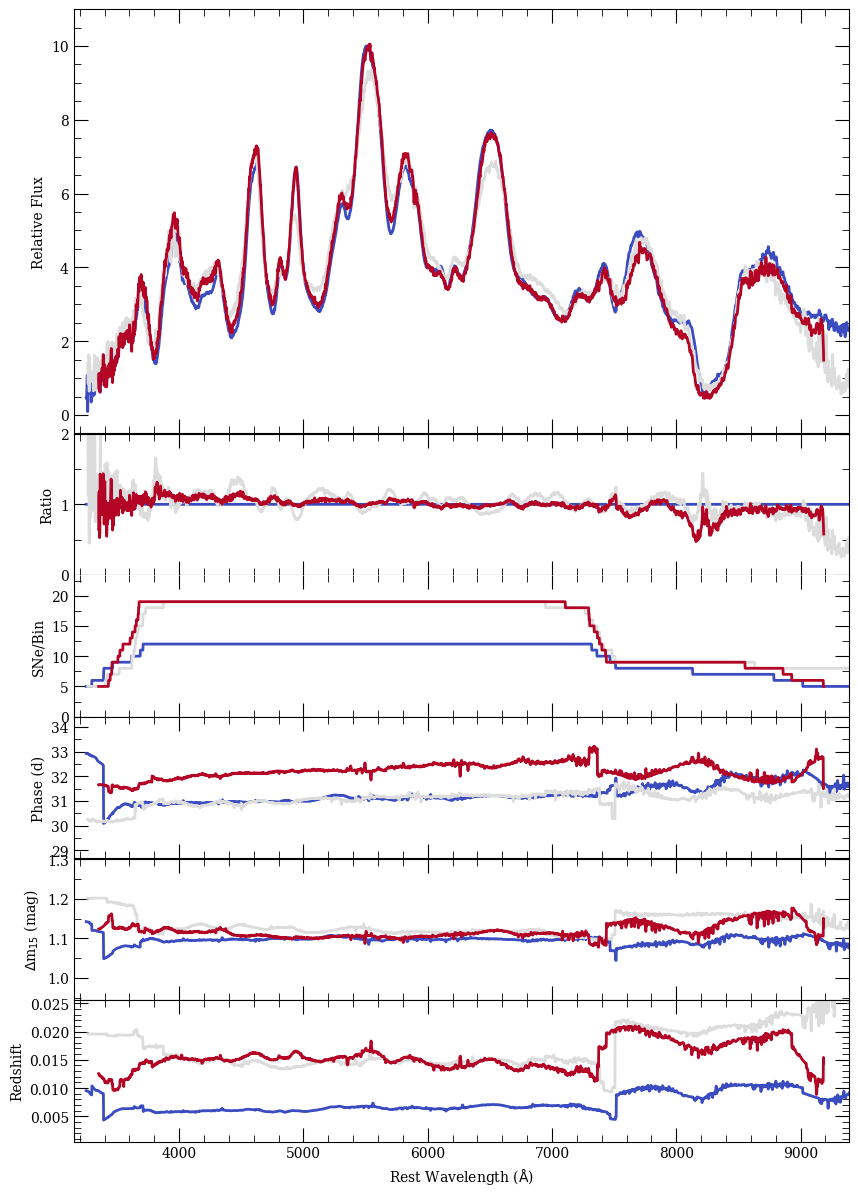

Phase:  38.952054699475426
dm15:  1.102472833132935
Redshift:  0.006511950763628364
Morphology:  12.465841043995239
Phase:  39.63803926310793
dm15:  1.0888899526014162
Redshift:  0.017069102297391753
Morphology:  12.861207833629864
Phase:  40.464813605245205
dm15:  1.0861802951835555
Redshift:  0.01345180929076859
Morphology:  13.116211435090129


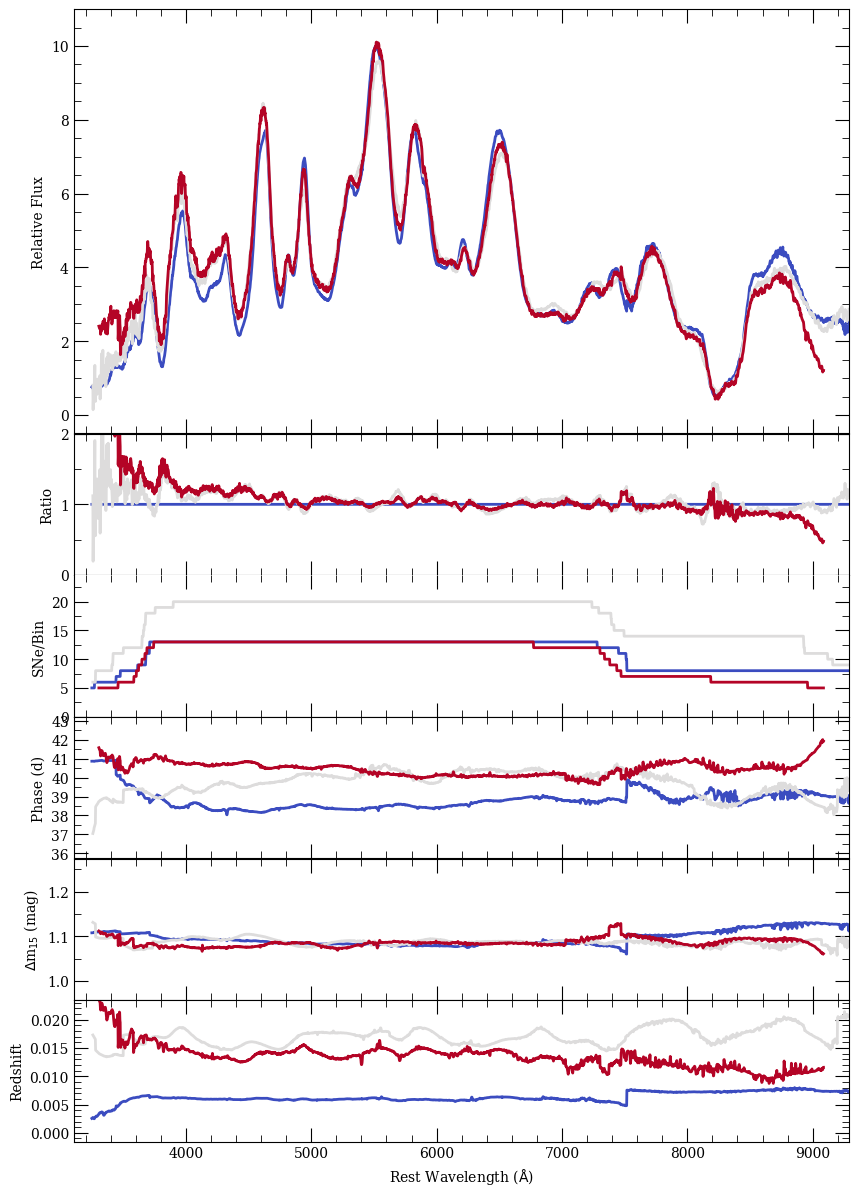

Phase:  49.23302398615734
dm15:  1.0940712989463017
Redshift:  0.006191384634965242
Morphology:  13.909962032118285
Phase:  47.49006636518586
dm15:  1.110149711145093
Redshift:  0.014551821731255892
Morphology:  12.525464681089465
Phase:  47.972793499981904
dm15:  1.1382324504079107
Redshift:  0.013489352759341
Morphology:  10.435955571485046


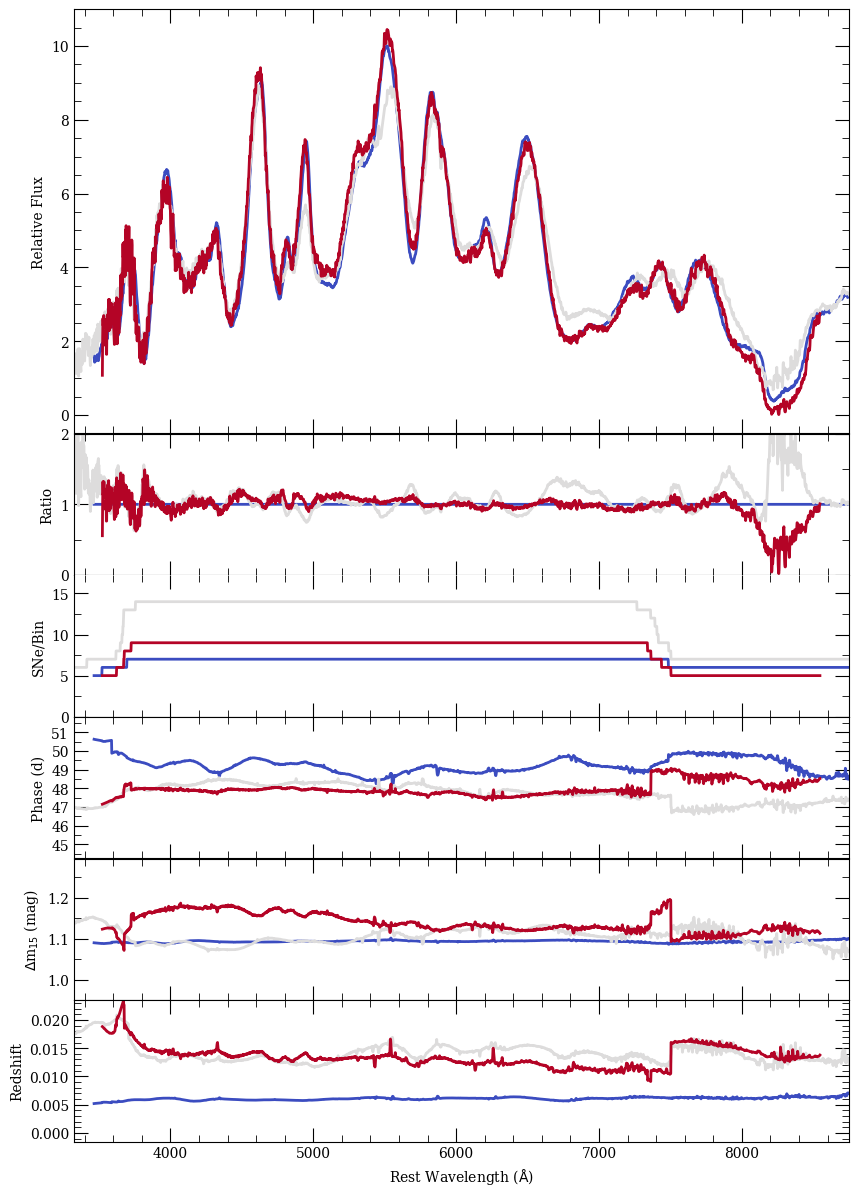

Phase:  56.69237437795158
dm15:  1.11896402013556
Redshift:  0.008521824246245256
Morphology:  11.131095484866712
Phase:  56.50304078162963
dm15:  1.08686845535551
Redshift:  0.012631273797878373
Morphology:  13.235574195461323
Phase:  58.36862793163073
dm15:  1.1480521534745158
Redshift:  0.012236678496013946
Morphology:  10.773962506600768


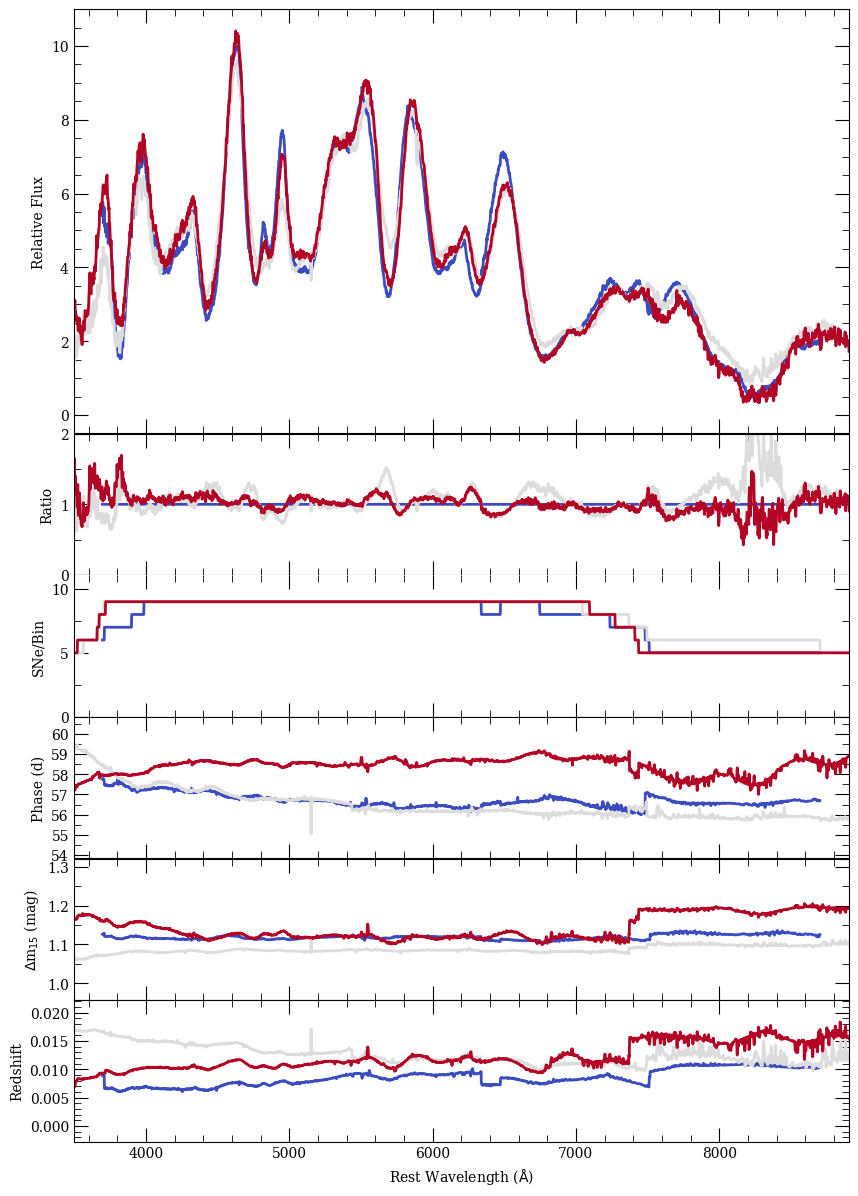

In [44]:
for i in range(1, len(composites_lowv)-1):
    comp_list = [composites_lowv[i], composites_highv[i], composites_midv[i]]
    kpora.set_min_num_spec(comp_list, 5)
    kplot.comparison_plot(comp_list, scale_type=False, min_num_show=5)

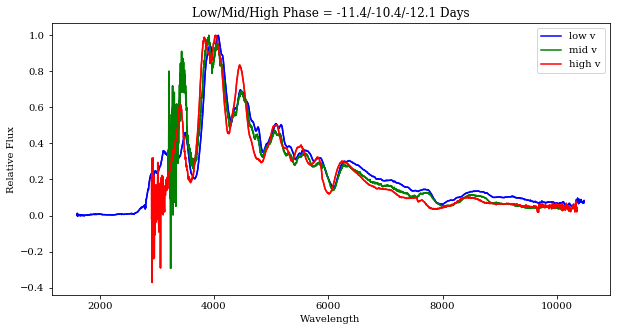

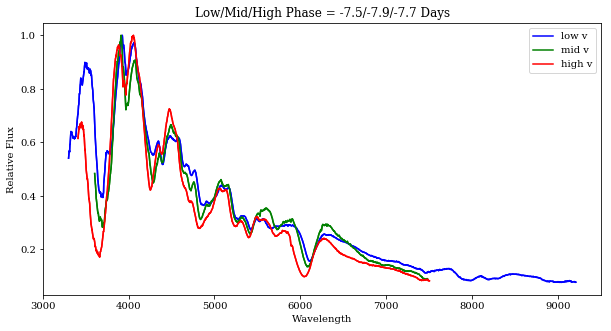

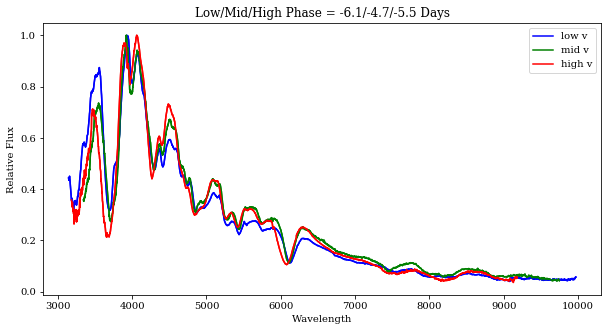

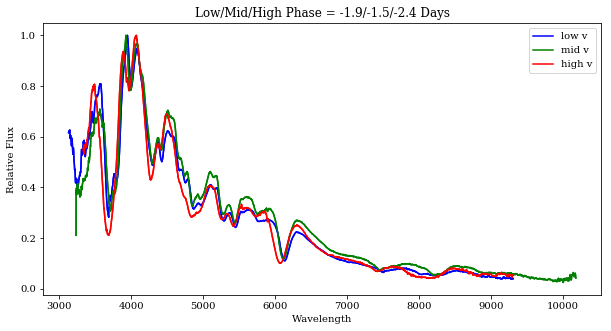

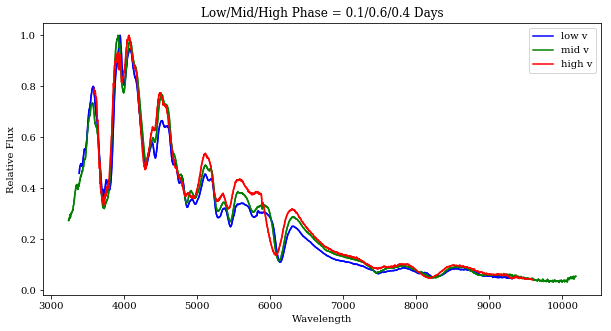

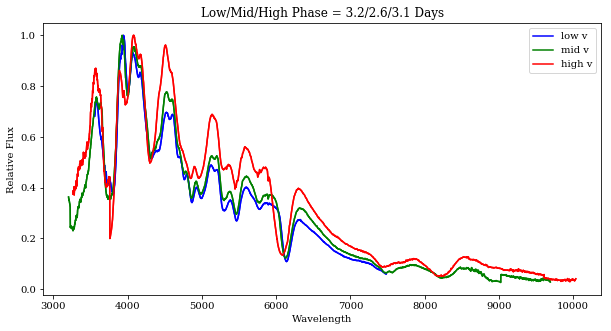

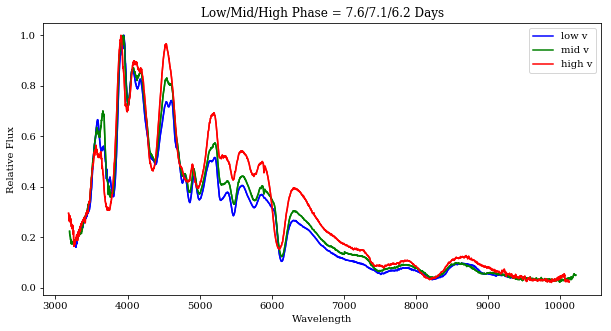

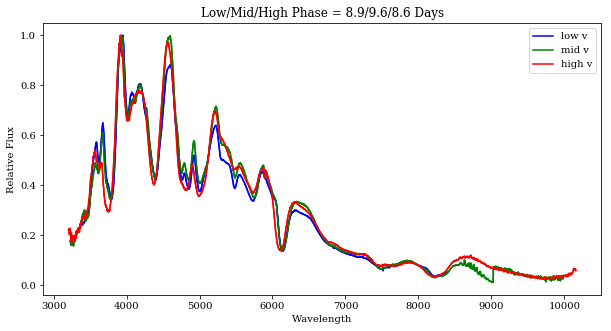

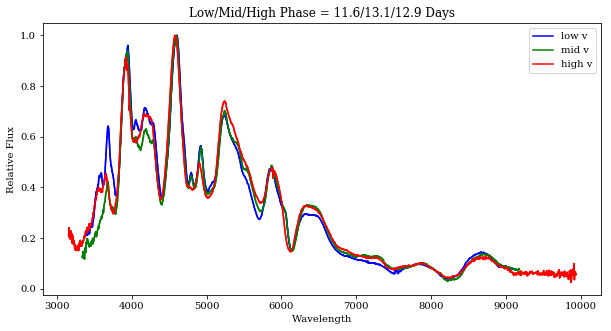

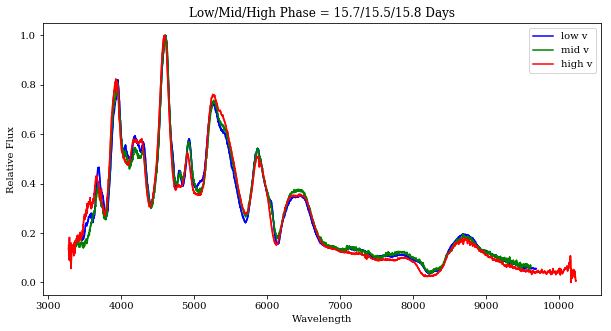

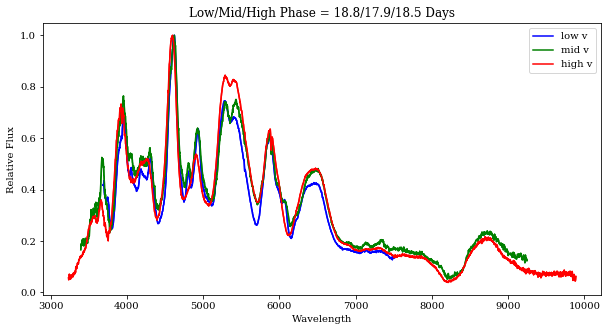

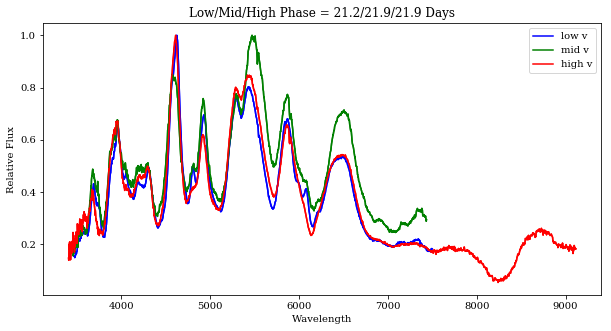

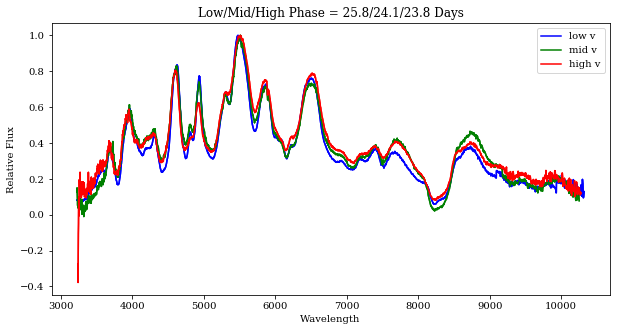

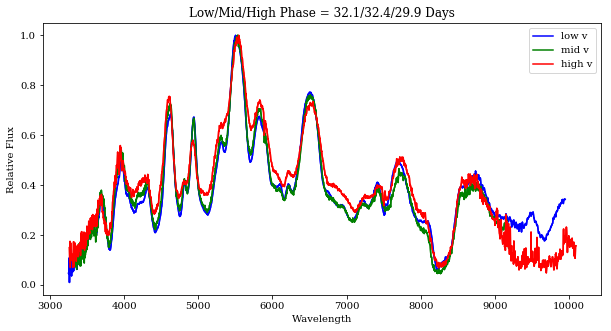

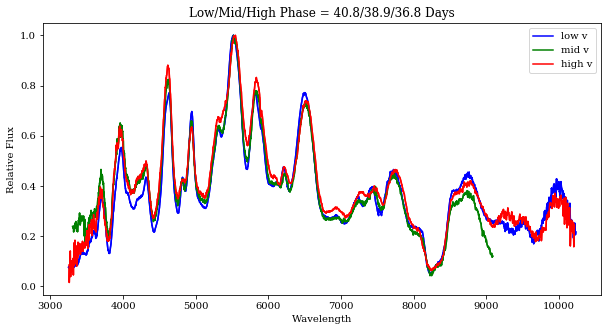

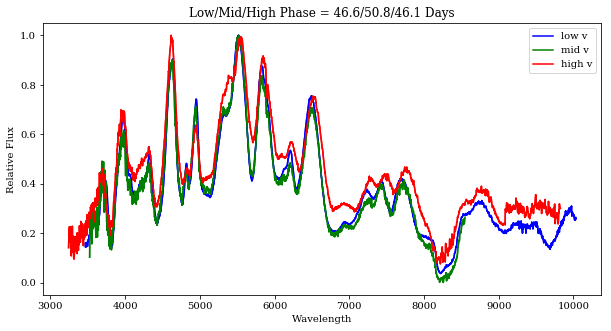

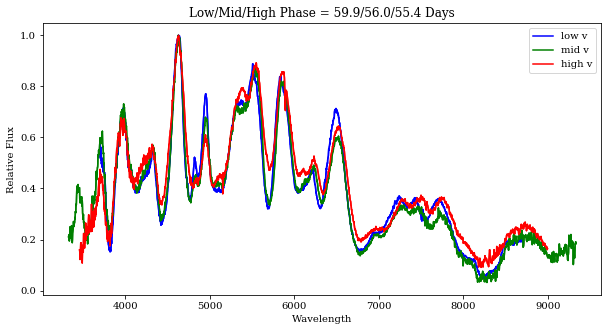

In [75]:
for i in range(len(composites_lowv)-1):
    lnear_phase = str(round(composites_lowv[i].phase,1))
    mnear_phase = str(round(composites_midv[i].phase,1))
    hnear_phase = str(round(composites_highv[i].phase,1))
    
    plt.figure(figsize=(10,5))
    plt.title("Low/Mid/High Phase = " + lnear_phase + '/' + mnear_phase + '/' + hnear_phase + " " + 'Days')
    plt.xlabel('Wavelength')
    plt.ylabel('Relative Flux')
   
    ax = plt.subplot(111)
    ax.plot(composites_lowv[i].wavelength[composites_lowv[i].x1:composites_lowv[i].x2], composites_lowv[i].flux[composites_lowv[i].x1:composites_lowv[i].x2], color = "blue", label='low v')
    ax.plot(composites_midv[i].wavelength[composites_midv[i].x1:composites_midv[i].x2], composites_midv[i].flux[composites_midv[i].x1:composites_midv[i].x2], color = "green", label = 'mid v')
    ax.plot(composites_highv[i].wavelength[composites_highv[i].x1:composites_highv[i].x2], composites_highv[i].flux[composites_highv[i].x1:composites_highv[i].x2], color = "red",  label='high v')
    ax.legend()
    
    plt.plot(composites_lowv[i].wavelength[composites_lowv[i].x1:composites_lowv[i].x2], composites_lowv[i].flux[composites_lowv[i].x1:composites_lowv[i].x2], color="blue")
    plt.plot(composites_midv[i].wavelength[composites_midv[i].x1:composites_midv[i].x2], composites_midv[i].flux[composites_midv[i].x1:composites_midv[i].x2], color = "green")
    plt.plot(composites_highv[i].wavelength[composites_highv[i].x1:composites_highv[i].x2], composites_highv[i].flux[composites_highv[i].x1:composites_highv[i].x2], color = "red")

# Color Curves

In [55]:
phases_lowv_1, comp_lowv_B_1, comp_lowv_V_1, errors_lowv_1 = sa.measure_comp_1m2(composites_lowv[1:-1], boot_arrs = boot_sn_arrays_lowv[1:-1], error=True)
phases_midv_1, comp_midv_B_1, comp_midv_V_1, errors_midv_1 = sa.measure_comp_1m2(composites_midv[1:-1], boot_arrs = boot_sn_arrays_midv[1:-1], error=True)
phases_highv_1, comp_highv_B_1, comp_highv_V_1, errors_highv_1 = sa.measure_comp_1m2(composites_highv[1:-1], boot_arrs = boot_sn_arrays_highv[1:-1], error=True)

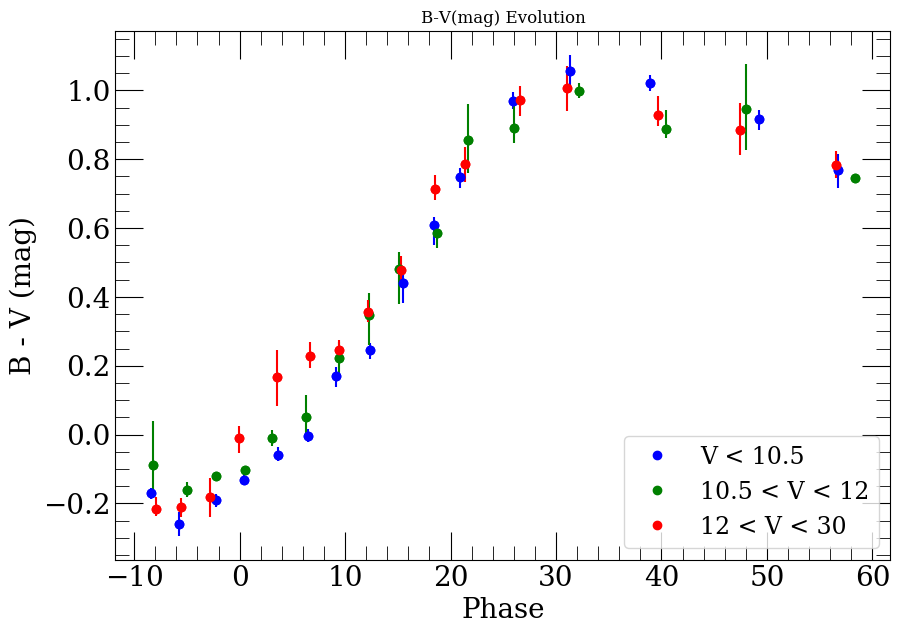

In [72]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.title("B-V(mag) Evolution")
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)

plt.plot(phases_lowv_1, np.asarray(comp_lowv_B_1)-np.asarray(comp_lowv_V_1),'o', color="blue", label='V < 10.5')
plt.errorbar(phases_lowv_1, np.asarray(comp_lowv_B_1)-np.asarray(comp_lowv_V_1), yerr=errors_lowv_1, fmt='o', color="blue")

plt.plot(phases_midv_1, np.asarray(comp_midv_B_1)-np.asarray(comp_midv_V_1),'o', color='green', label = '10.5 < V < 12')
plt.errorbar(phases_midv_1, np.asarray(comp_midv_B_1)-np.asarray(comp_midv_V_1), yerr=errors_midv_1, fmt='o', color="green")

plt.plot(phases_highv_1, np.asarray(comp_highv_B_1)-np.asarray(comp_highv_V_1),'o', color='red', label = '12 < V < 30')
plt.errorbar(phases_highv_1, np.asarray(comp_highv_B_1)-np.asarray(comp_highv_V_1), yerr=errors_highv_1, fmt='o', color="red")


plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [57]:
phases_lowv, comp_lowv_V, comp_lowv_i, errors_lowv = sa.measure_comp_1m2(composites_lowv[1:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_lowv[1:-1], error=True)
phases_midv, comp_midv_V, comp_midv_i, errors_midv = sa.measure_comp_1m2(composites_midv[1:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_midv[1:-1], error=True)
phases_highv, comp_highv_V, comp_highv_i, errors_highv = sa.measure_comp_1m2(composites_highv[1:-1], filts = ['GROUND_JOHNSON_V','SDSS_i'], boot_arrs = boot_sn_arrays_highv[1:-1], error=True)

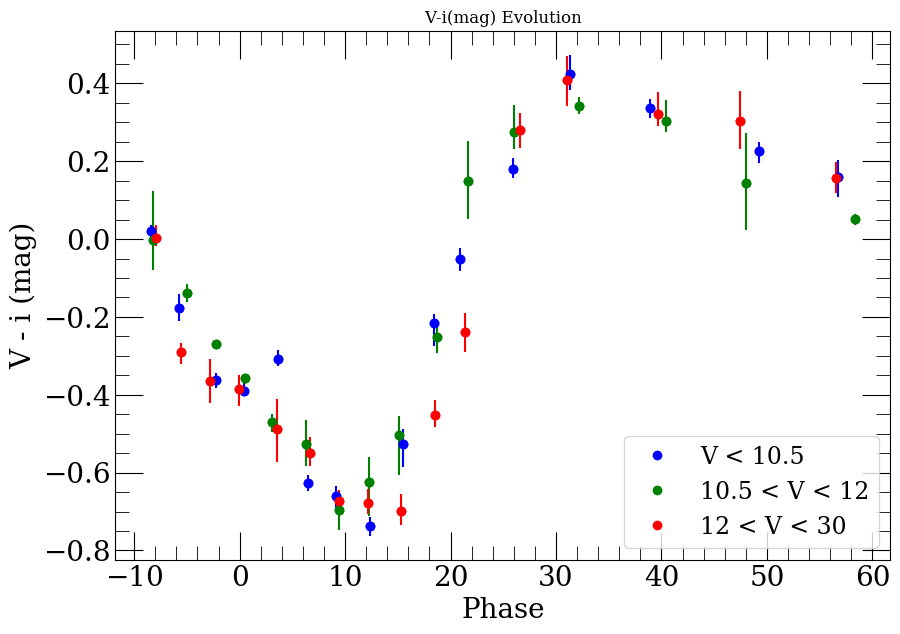

In [74]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.title("V-i(mag) Evolution")
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Phase', fontsize = 20)
plt.ylabel('V - i (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    direction='in',
    length=10)
#plt.plot(phases_lowv_1, np.asarray(comp_lowv_V)-np.asarray(comp_lowv_i),'o', color='blue', label = 'V < 10.5')#, yerr=errors_lowv_1,fmt='o', markersize=8, color = 'blue', label='V < 11 (10^3 km/s)')
#plt.plot(phases_midv_1, np.asarray(comp_midv_V)-np.asarray(comp_midv_i),'o', color='green', label = '10.5 < V < 12')
#plt.plot(phases_highv_1, np.asarray(comp_highv_V)-np.asarray(comp_highv_i),'o', color='red', label = '12 < V < 30')#, yerr=errors_highv_1, fmt='o', markersize=8, color = 'red', label='V > 11 (10^3 km/s)')

plt.plot(phases_lowv_1, np.asarray(comp_lowv_V)-np.asarray(comp_lowv_i),'o', color="blue", label='V < 10.5')
plt.errorbar(phases_lowv_1, np.asarray(comp_lowv_V)-np.asarray(comp_lowv_i), yerr=errors_lowv_1, fmt='o', color="blue")

plt.plot(phases_midv_1, np.asarray(comp_midv_V)-np.asarray(comp_midv_i),'o', color='green', label = '10.5 < V < 12')
plt.errorbar(phases_midv_1, np.asarray(comp_midv_V)-np.asarray(comp_midv_i), yerr=errors_midv_1, fmt='o', color="green")

plt.plot(phases_highv_1, np.asarray(comp_highv_V)-np.asarray(comp_highv_i),'o', color='red', label = '12 < V < 30')
plt.errorbar(phases_highv_1, np.asarray(comp_highv_V)-np.asarray(comp_highv_i), yerr=errors_highv_1, fmt='o', color="red")

plt.legend(loc=4, fontsize=17, numpoints=1)
# plt.savefig('../../Hubble_Residual_Paper/hr_color_curve.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# high dm15

In [76]:
query_strings_highv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)"]
max_phase = 53.
p1 = -10.
k = 3.
#p2 = p1+k
while p1 < max_phase:
    if 32 >= p1 > 20.:
        k = 6.
    if p1 >32:
        k = 9.
    p2 = p1+k
    #p2 += k
    
    #print (p1,p2)
    query_strings_highv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)"% (p1,p2))
    p1 += k

        
for q in query_strings_highv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)
SELECT * from Spectra inner

In [77]:
query_strings_lowv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)"]
max_phase = 53.
p1 = -10.
k = 3.
#p2 = p1+k
while p1 < max_phase:
    if 32 >= p1 > 20.:
        k = 6.
    if p1 >32:
        k = 9.
    p2 = p1+k
    #p2 += k
    
    #print (p1,p2)
    query_strings_lowv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)"% (p1,p2))
    p1 += k

        
for q in query_strings_lowv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.000000 and ph

In [78]:
composites_lowv, sn_arrays_lowv, boot_sn_arrays_lowv = kpora.make_composite(query_strings_lowv, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)
8 Total Spectra found
0 flagged spectra removed 8 spectra left
0 spectra of peculiar Ias removed 8 spectra left
8 spectra of SNe that have host reddening corrections
Arrays cleaned
8 spectra may have telluric contamination
2 total SNe
removed spectra of SNe with A_V > 2.0
Using 8 spectra of 2 SNe
Gini balancing...
Balanced after 1 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)
17 Total Spectra found
0 flagged spectra removed 17 spectra left
0 spectra of peculiar Ias removed 17 spectra left
17 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra 

0 spectra may have telluric contamination
17 total SNe
removed spectra of SNe with A_V > 2.0
Using 32 spectra of 17 SNe
Gini balancing...
Balanced after 11 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 35.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -11500)
18 Total Spectra found
0 flagged spectra removed 18 spectra left
0 spectra of peculiar Ias removed 18 spectra left
18 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0
Using 18 spectra of 13 SNe
Gini balancing...
Balanced after 6 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 35.000000 and phase < 44.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 > -1

In [79]:
composites_highv, sn_arrays_highv, boot_sn_arrays_highv = kpora.make_composite(query_strings_highv, boot=False, medmean=1, verbose=False, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)
0 Total Spectra found
0 flagged spectra removed 0 spectra left
0 spectra of peculiar Ias removed 0 spectra left
0 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
0 total SNe
removed spectra of SNe with A_V > 2.0
Using 0 spectra of 0 SNe
No spectra found
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)
11 Total Spectra found
1 flagged spectra removed 10 spectra left
0 spectra of peculiar Ias removed 10 spectra left
10 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spe

1 flagged spectra removed 25 spectra left
0 spectra of peculiar Ias removed 25 spectra left
25 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
19 total SNe
removed spectra of SNe with A_V > 2.0
Using 25 spectra of 18 SNe
Gini balancing...
Balanced after 6 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 29.000000 and phase < 35.000000 and ((dm15_source >= 1.3 and dm15_source < 1.9) or (dm15_from_fits >= 1.3 and dm15_from_fits < 1.9)) and (si_v0 between -30000 and -11500)
20 Total Spectra found
0 flagged spectra removed 20 spectra left
0 spectra of peculiar Ias removed 20 spectra left
20 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
15 total SNe
removed spectra of SNe with A_V > 2.0
Using 20 spectra of 15 SNe
Gini balancing...
Balanced after 4 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectr

Phase:  -8.404938319992457
dm15:  1.41342735838295
Redshift:  0.01245382322468247
Morphology:  11.009787528376693
Phase:  -7.6080701881181945
dm15:  1.430657985644227
Redshift:  0.026540687601270048
Morphology:  8.564147909691076


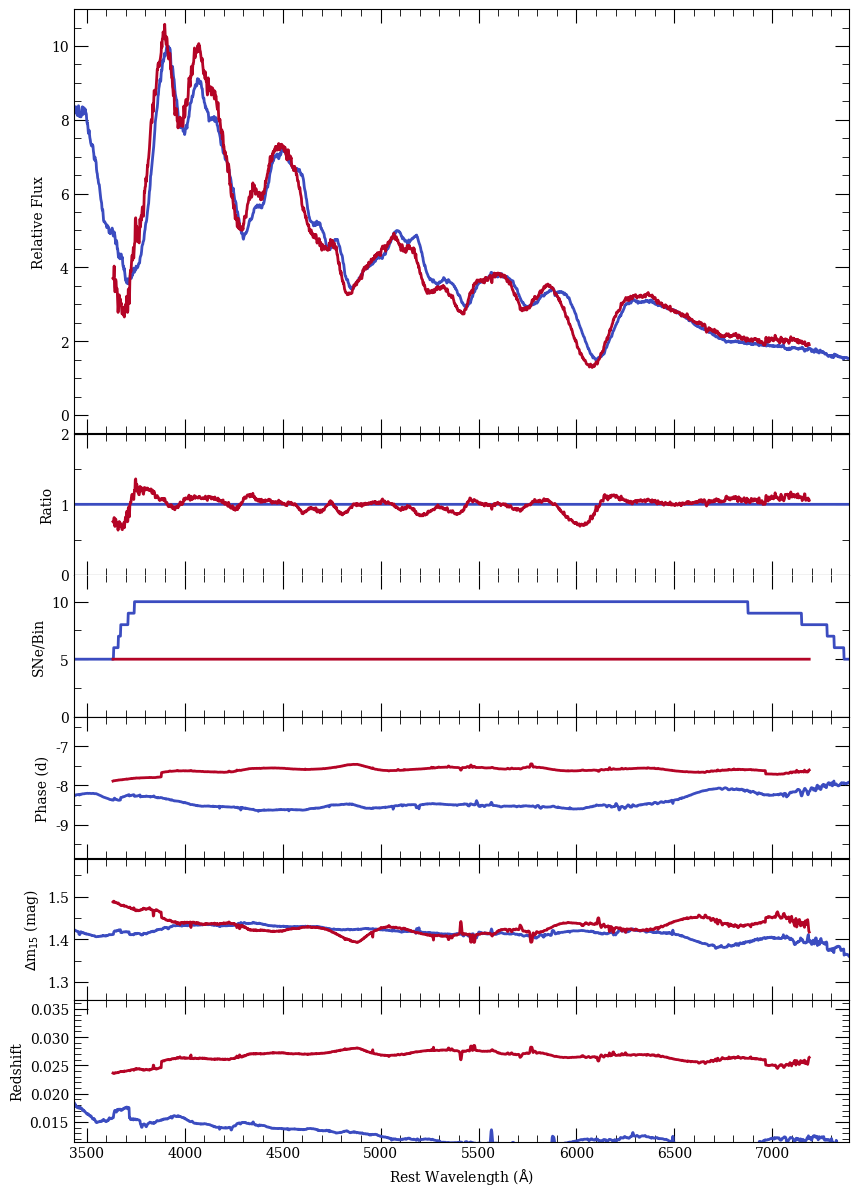

Phase:  -5.431797394925547
dm15:  1.4370601670467973
Redshift:  0.012605247090626576
Morphology:  12.215655862587608
Phase:  -5.336198833616397
dm15:  1.4600429194628919
Redshift:  0.025902520335140136
Morphology:  6.749838540402396


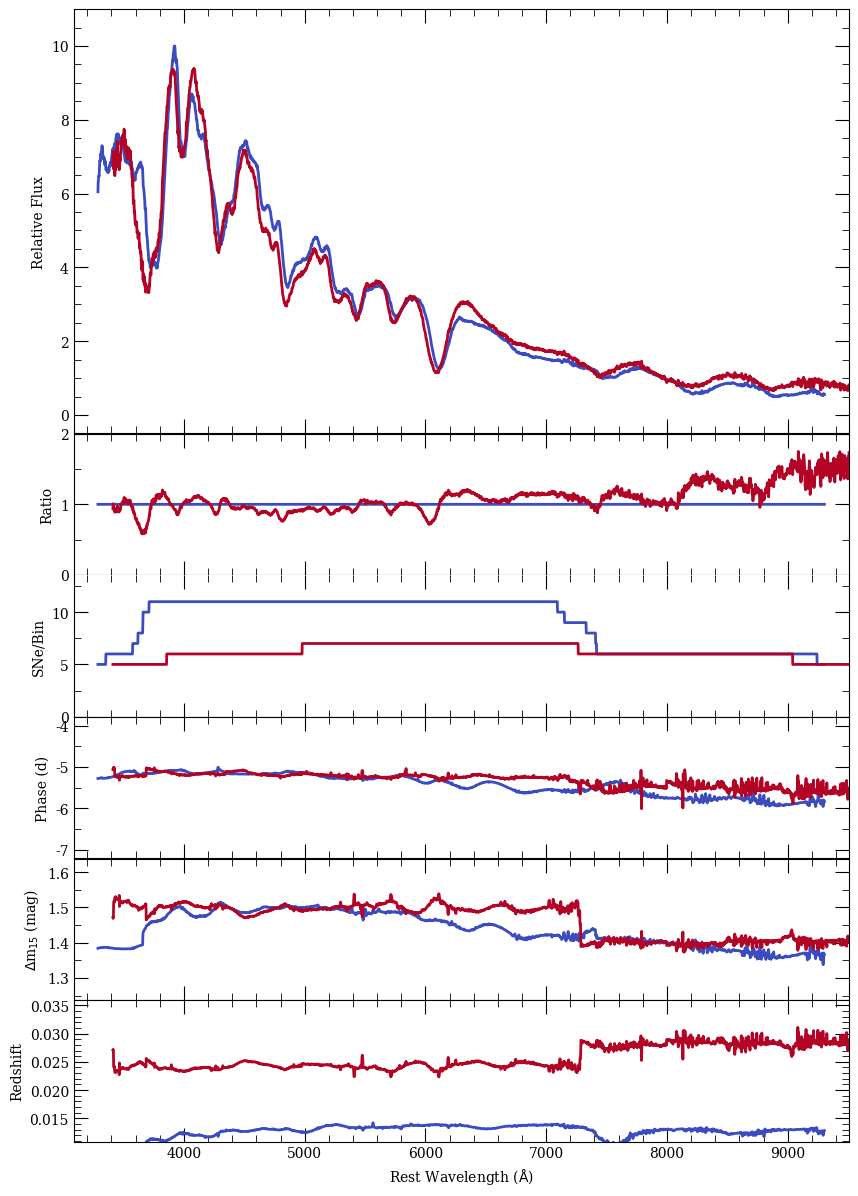

Phase:  -2.269704127013597
dm15:  1.477248473731019
Redshift:  0.013111343801222173
Morphology:  9.255904112579149
Phase:  -2.486201670178864
dm15:  1.4868083770583485
Redshift:  0.022361613641134565
Morphology:  4.885666652354073


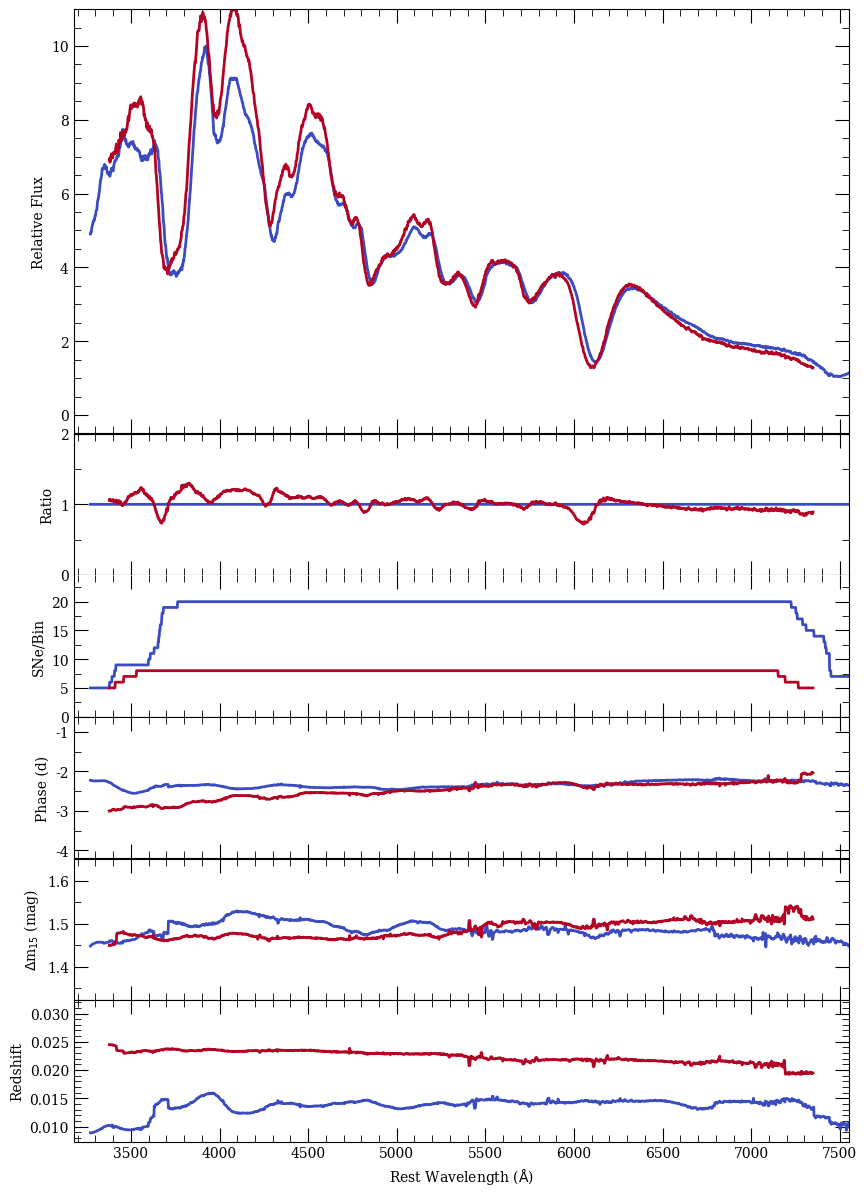

Phase:  0.3964077869993095
dm15:  1.5447316563755569
Redshift:  0.01436860979912103
Morphology:  7.028143770341657
Phase:  0.7116735684809399
dm15:  1.5446147568945496
Redshift:  0.022332554797563676
Morphology:  6.471016734115372


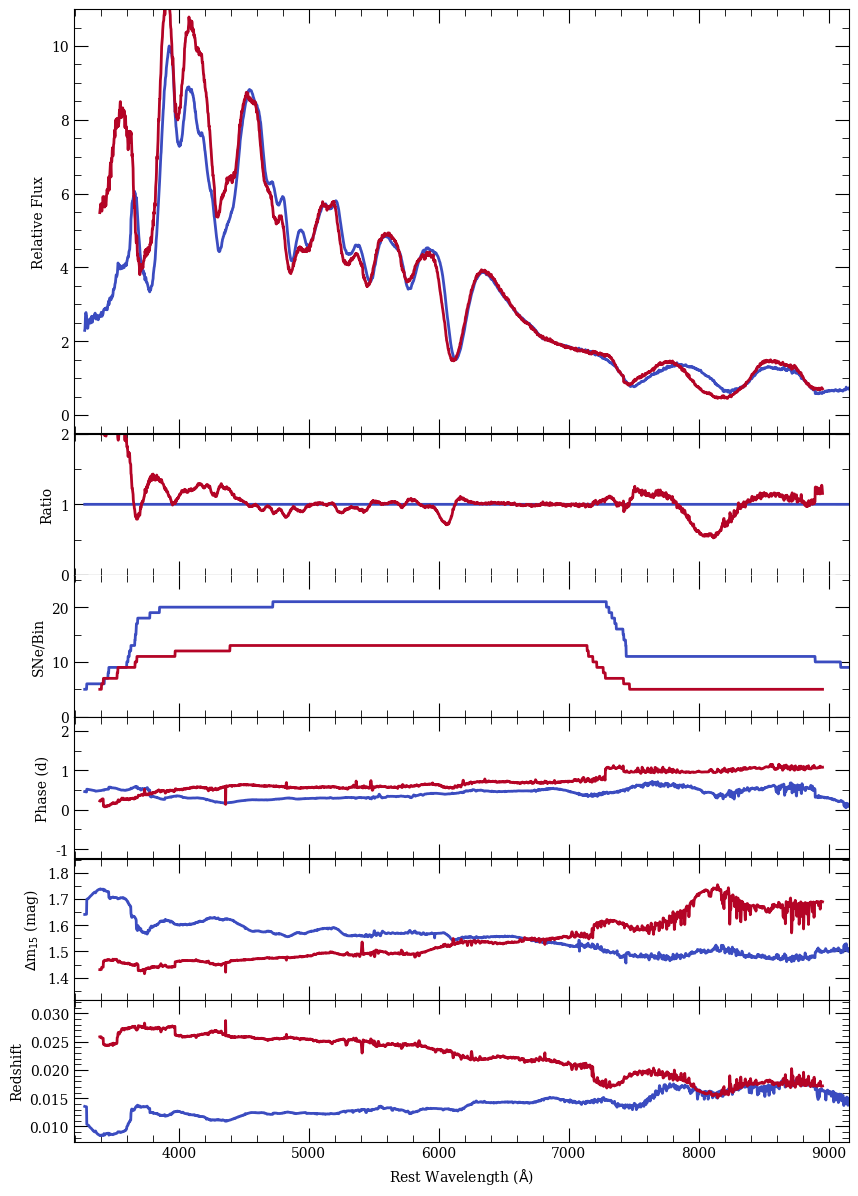

Phase:  3.136471842125242
dm15:  1.5181953023945687
Redshift:  0.01150471068039728
Morphology:  8.60679092129142
Phase:  3.9075974230210386
dm15:  1.4398584514185178
Redshift:  0.025689856352807544
Morphology:  6.60858083864769


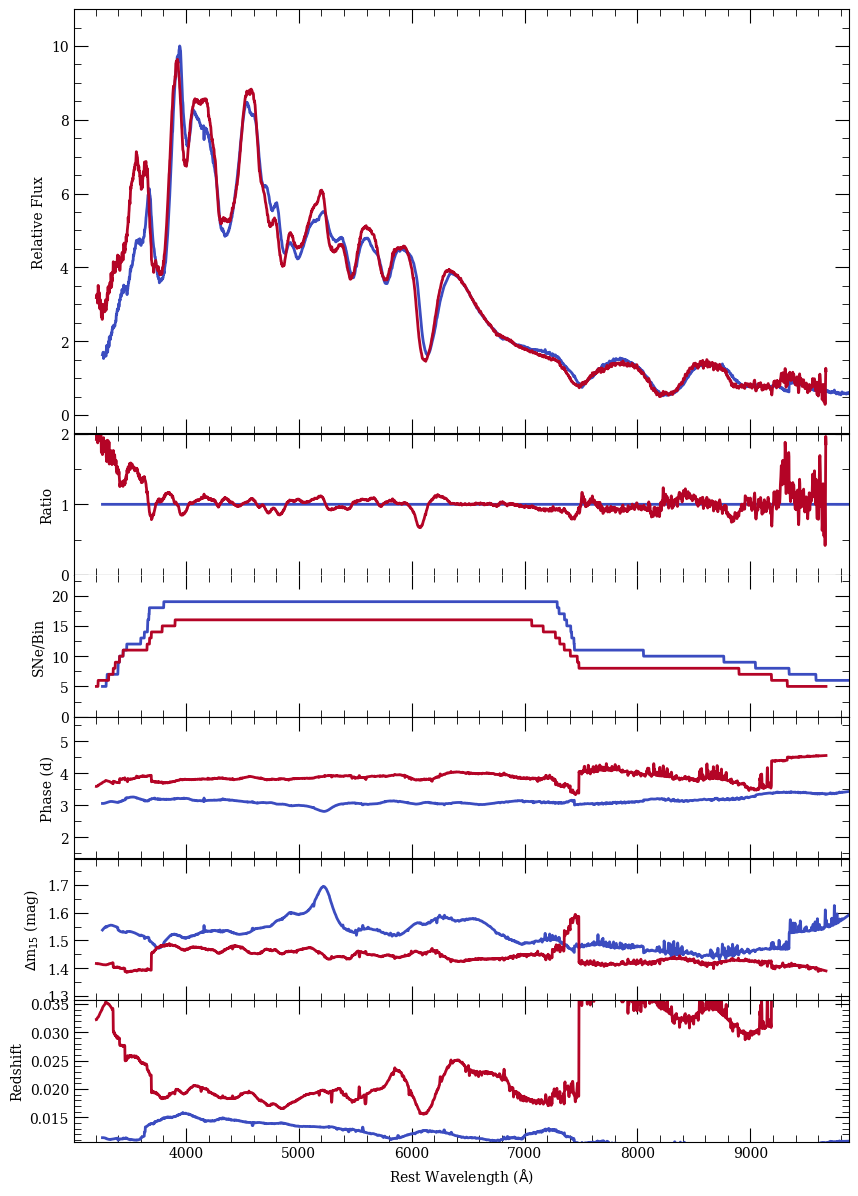

Phase:  6.663646577337174
dm15:  1.4810627748938998
Redshift:  0.015057743550638828
Morphology:  11.649650003878484
Phase:  6.498596136073429
dm15:  1.5153746373847468
Redshift:  0.022430456499153317
Morphology:  8.114526384999534


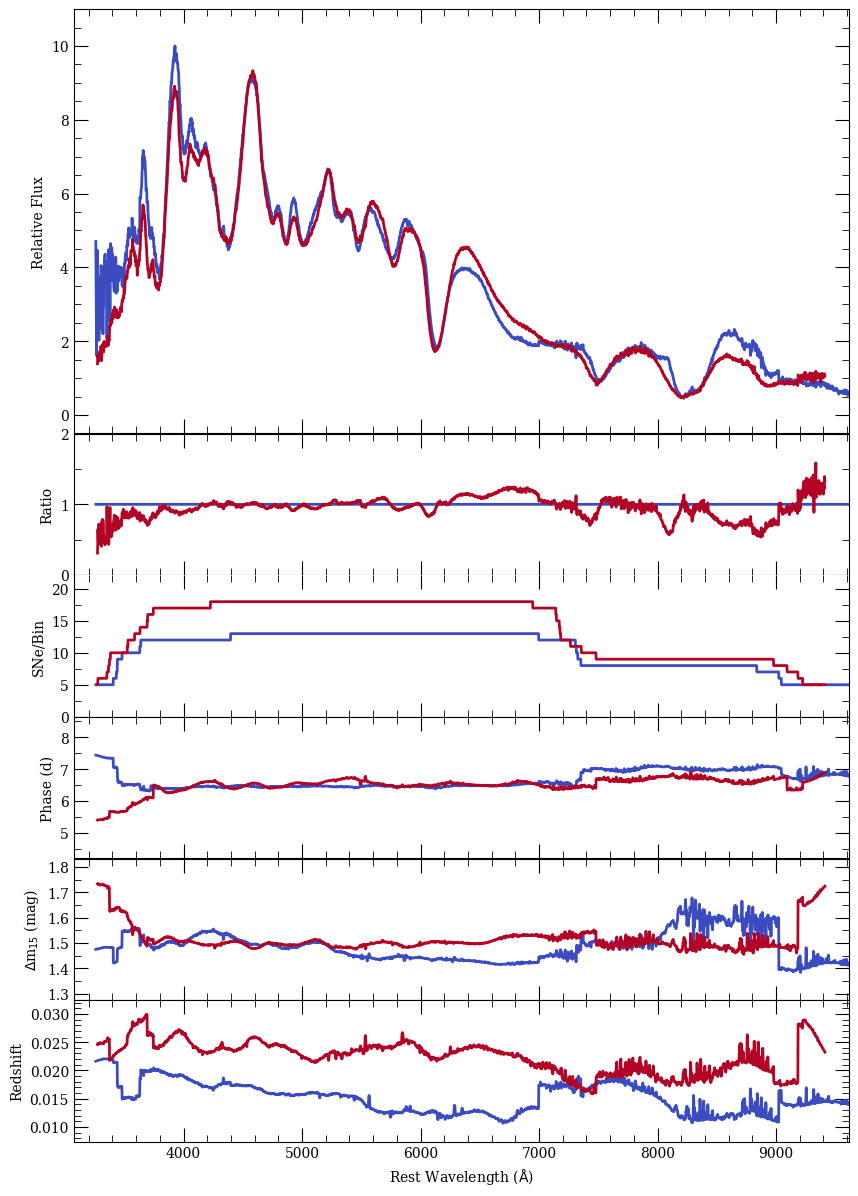

Phase:  9.582814563978513
dm15:  1.5127037880494831
Redshift:  0.012102172299988672
Morphology:  9.33094085266906
Phase:  9.34910473085181
dm15:  1.473316826910138
Redshift:  0.022189157192950906
Morphology:  9.190939399997383


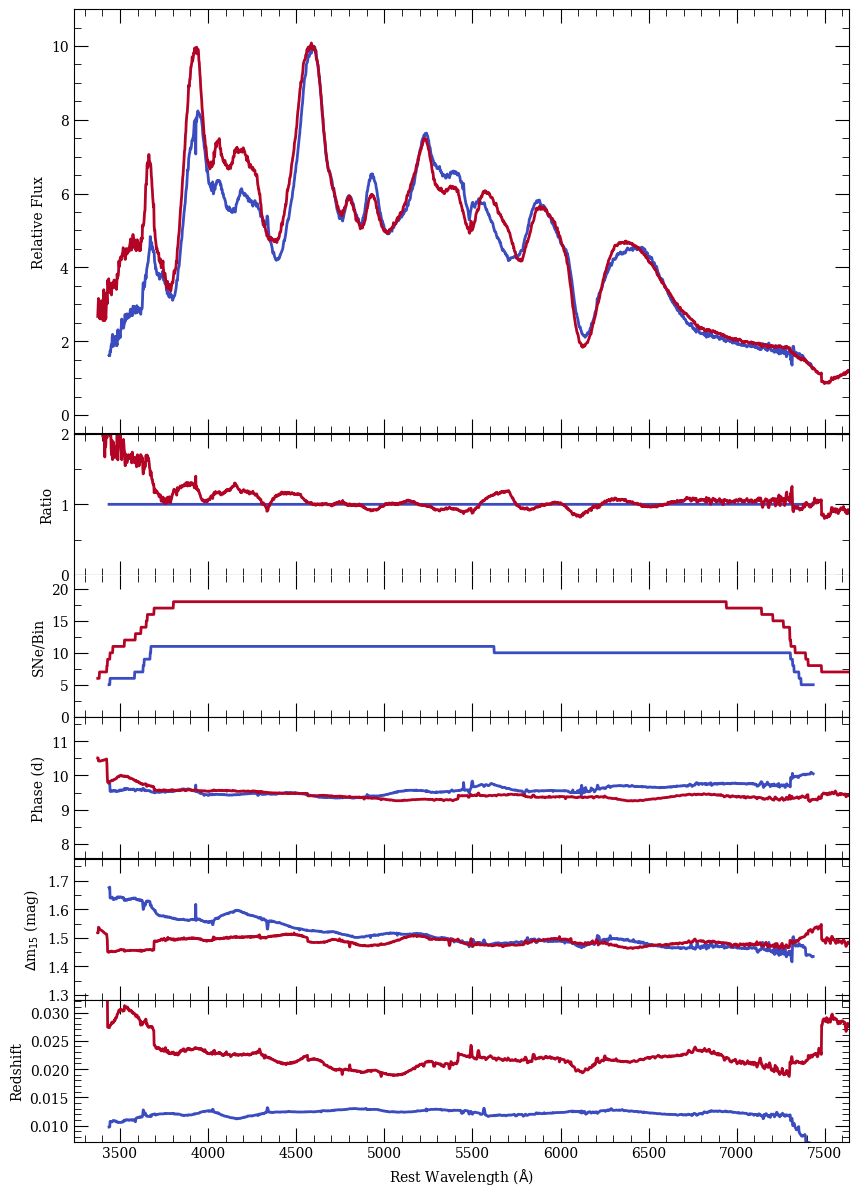

Phase:  12.67741542011379
dm15:  1.4700041727933029
Redshift:  0.010747784513972953
Morphology:  11.404927180688391
Phase:  12.407479699761728
dm15:  1.545309473319985
Redshift:  0.02355828246168306
Morphology:  9.836685445416379


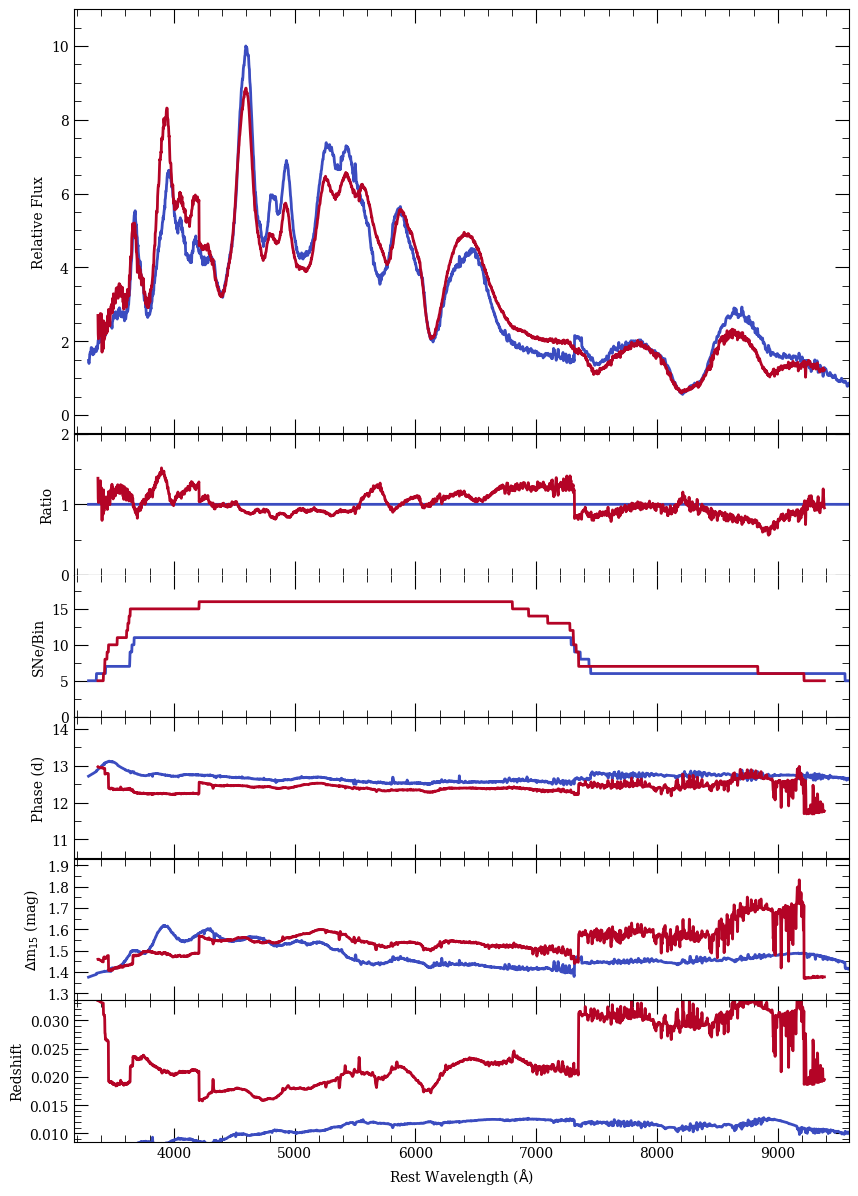

Phase:  15.302232646501235
dm15:  1.4320305937401652
Redshift:  0.010021523871116253
Morphology:  10.80374848520459
Phase:  15.319809690417125
dm15:  1.4972483690689142
Redshift:  0.021475231750762467
Morphology:  7.537032354641772


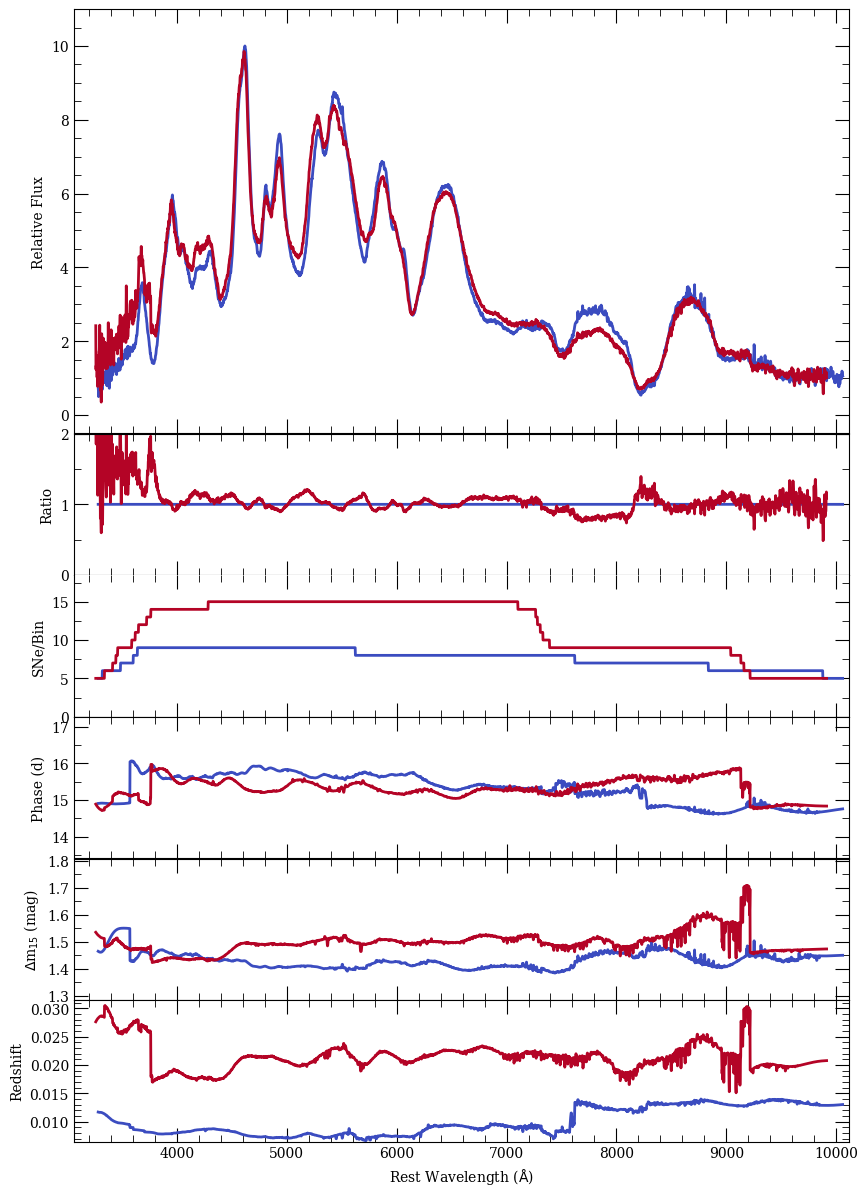

Phase:  18.91400887003082
dm15:  1.567008485496262
Redshift:  0.006755601987055741
Morphology:  8.959489221645917
Phase:  18.697369335540493
dm15:  1.4612569205574506
Redshift:  0.022999999603030934
Morphology:  9.561866201785564


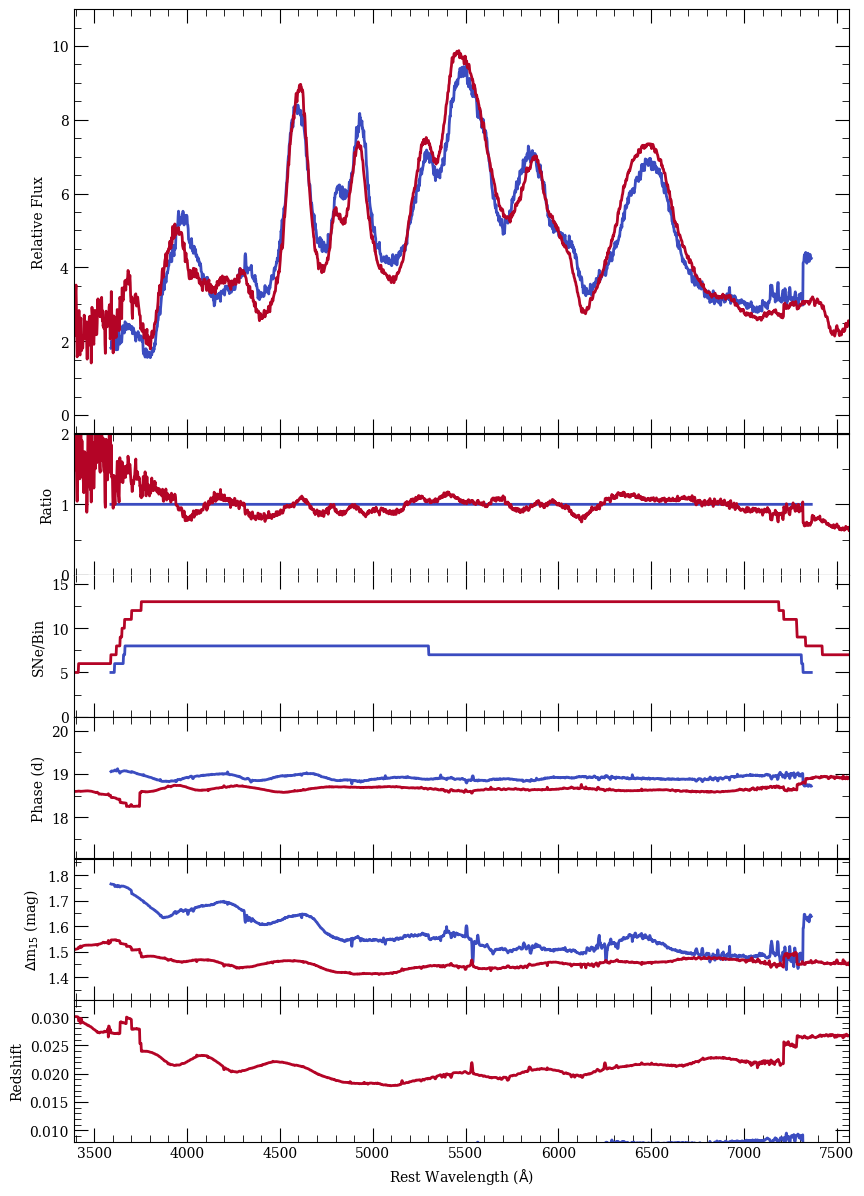

Phase:  21.675449871734248
dm15:  1.5256658594736345
Redshift:  0.01019925973169956
Morphology:  8.664448248963692
Phase:  21.408452298525624
dm15:  1.4767749093226945
Redshift:  0.022179502089430207
Morphology:  7.2058853960937475


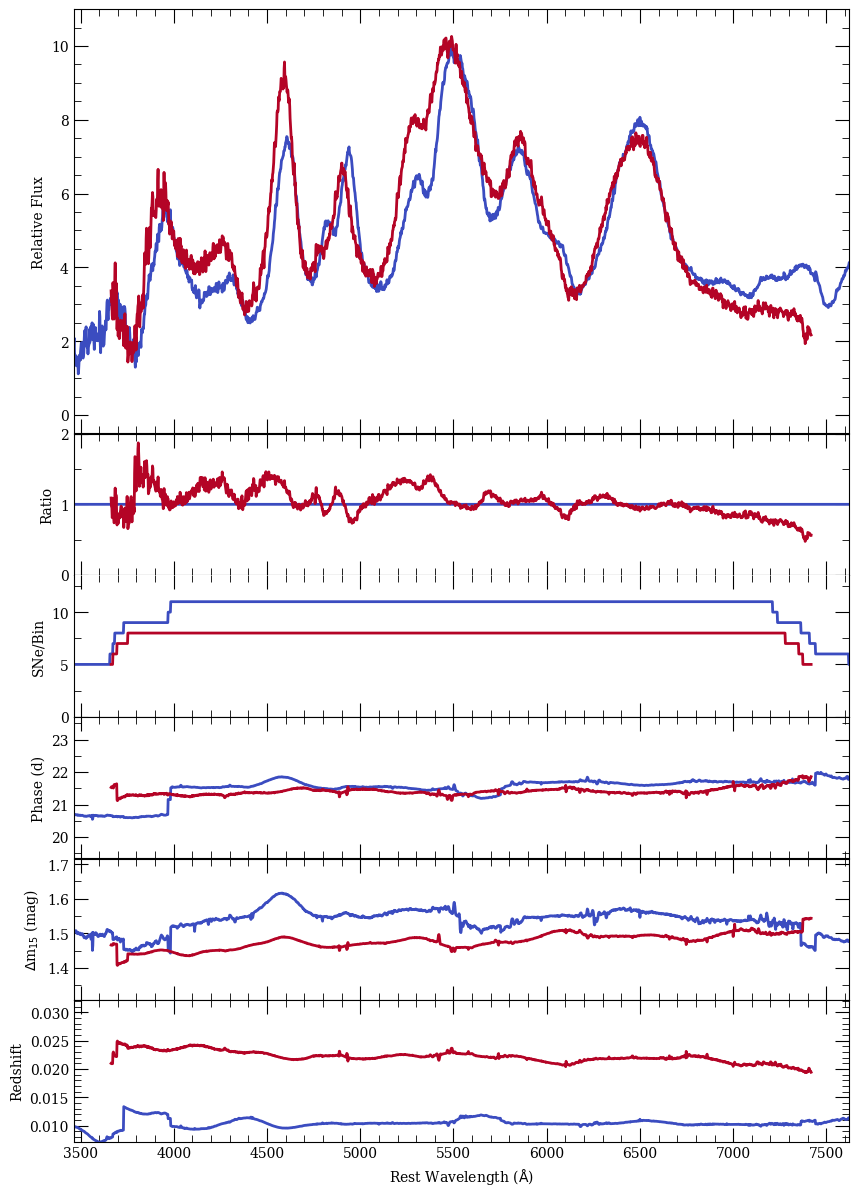

Phase:  27.096740334334978
dm15:  1.5208427260018296
Redshift:  0.012534594126090658
Morphology:  8.75704682806899
Phase:  25.59034728555045
dm15:  1.506479379545808
Redshift:  0.025178640203820987
Morphology:  5.651846317715633


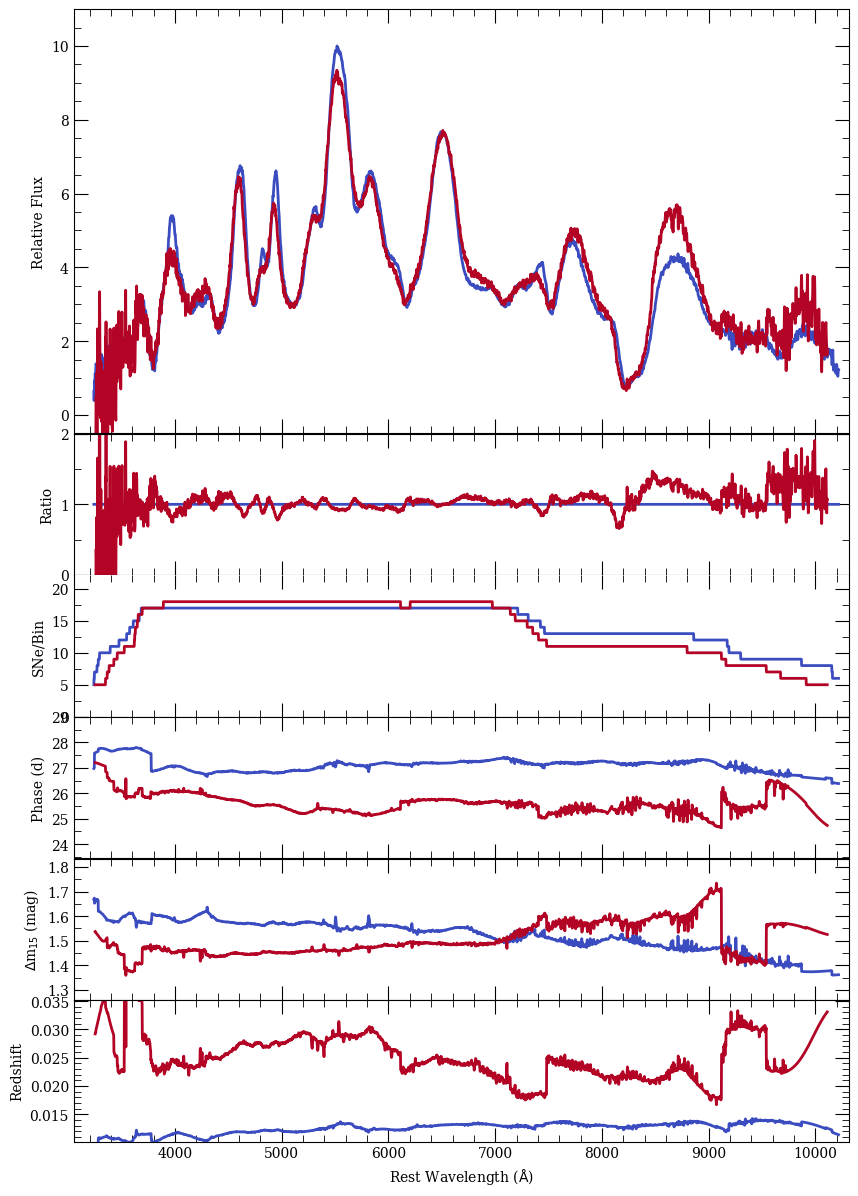

Phase:  30.706079858517302
dm15:  1.5534723141436655
Redshift:  0.010574045844947479
Morphology:  7.5681747599233615
Phase:  32.298143151261954
dm15:  1.4310358836699983
Redshift:  0.018622883368103745
Morphology:  8.344575796852695


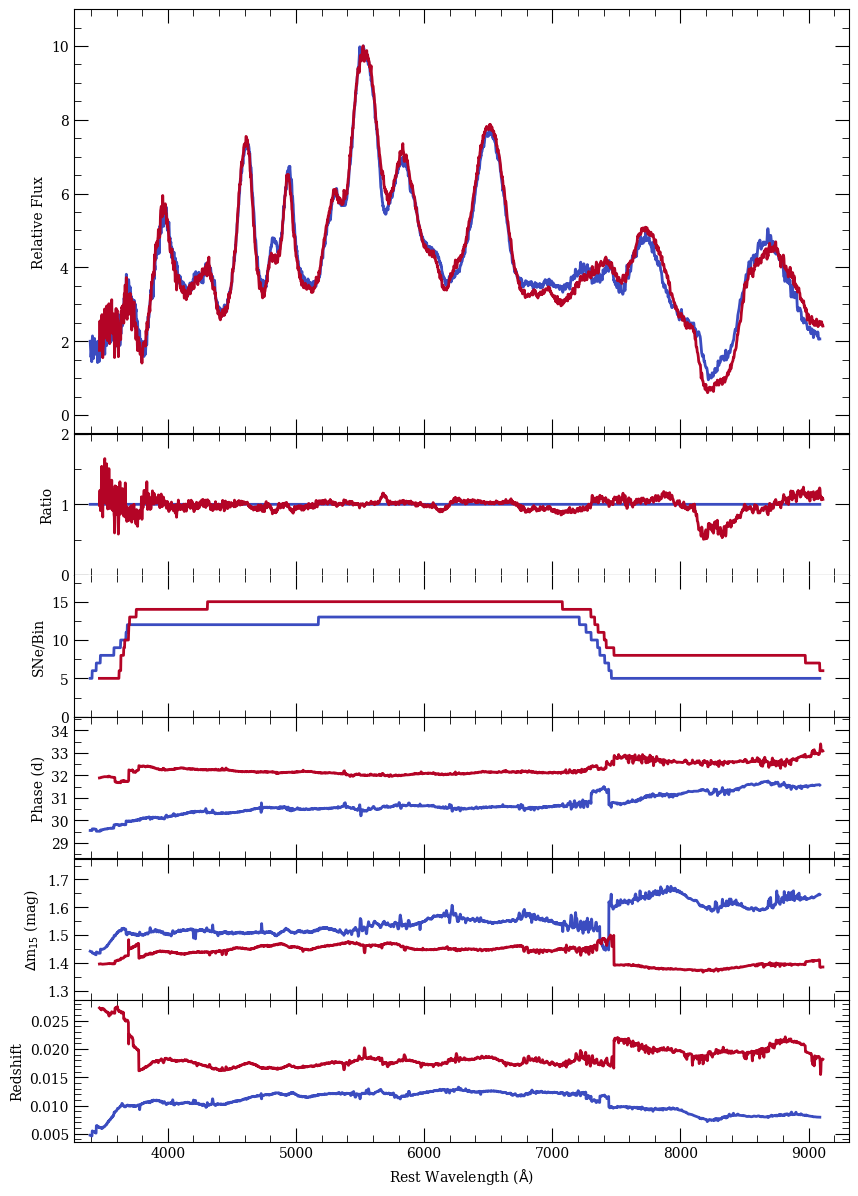

Phase:  39.08520383054107
dm15:  1.5489551724207207
Redshift:  0.010293372599033221
Morphology:  6.888875380463769
Phase:  38.2002258724222
dm15:  1.4088265768766493
Redshift:  0.015191666571731119
Morphology:  7.3998441216391075


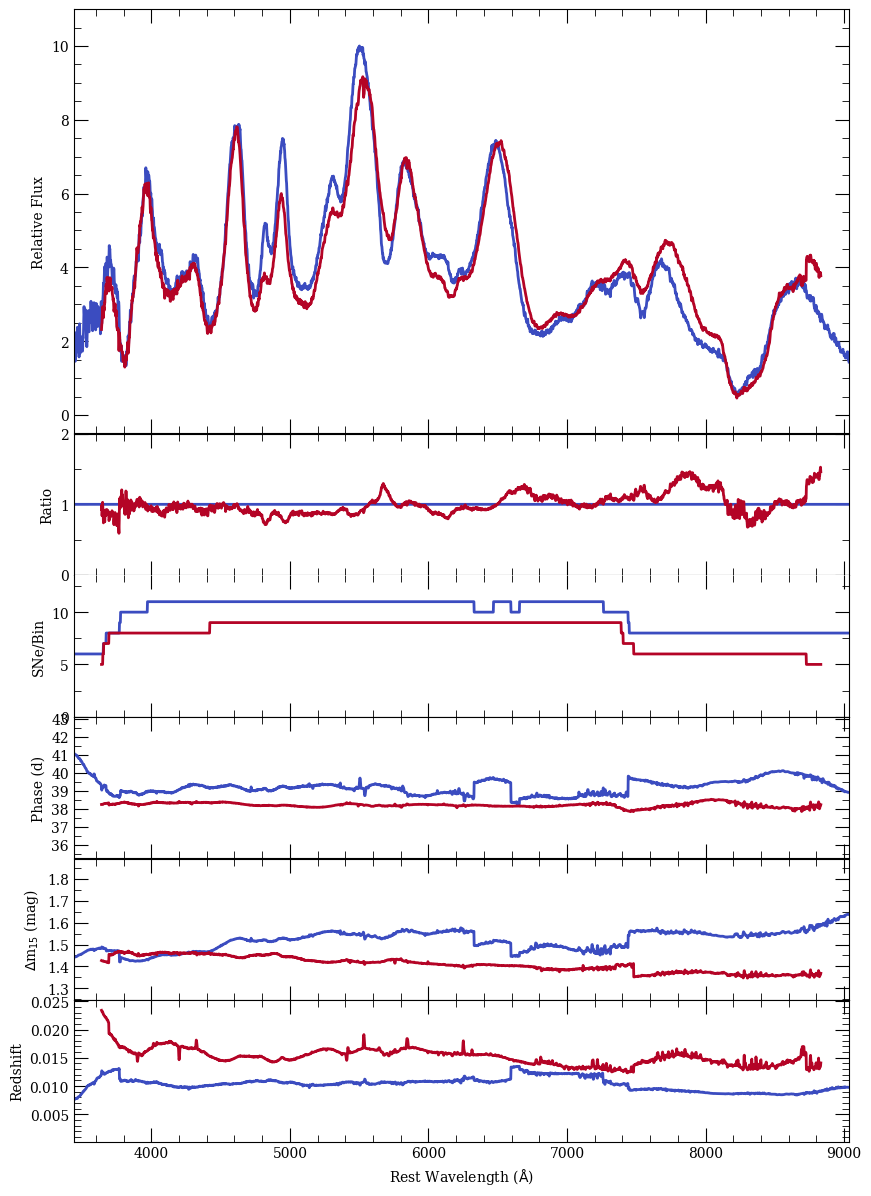

In [80]:
for i in range(1, len(composites_lowv)-1):
    comp_list = [composites_lowv[i], composites_highv[i]]
    kpora.set_min_num_spec(comp_list, 5)
    kplot.comparison_plot(comp_list, scale_type=False, min_num_show=5)

# low dm15

In [3]:
query_strings_highv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)"]
max_phase = 53.
p1 = -10.
k = 3.
#p2 = p1+k
while p1 < max_phase:
    if 32 >= p1 > 20.:
        k = 6.
    if p1 >32:
        k = 9.
    p2 = p1+k
    #p2 += k
    
    #print (p1,p2)
    query_strings_highv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)"% (p1,p2))
    p1 += k

        
for q in query_strings_highv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)
SELECT * from Spect

In [4]:
query_strings_lowv = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)"]
max_phase = 53.
p1 = -10.
k = 3.
#p2 = p1+k
while p1 < max_phase:
    if 32 >= p1 > 20.:
        k = 6.
    if p1 >32:
        k = 9.
    p2 = p1+k
    #p2 += k
    
    #print (p1,p2)
    query_strings_lowv.append("SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= %f and phase < %f and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)"% (p1,p2))
    p1 += k

        
for q in query_strings_lowv:
    print q

SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -10.000000 and phase < -7.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -7.000000 and phase < -4.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -4.000000 and phase < -1.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)
SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= -1.00000

In [44]:
composites_lowv, sn_arrays_lowv, boot_sn_arrays_lowv = kpora.make_composite(query_strings_lowv, boot=False, medmean=1, verbose=True, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)
9 Total Spectra found
0 flagged spectra removed 9 spectra left
0 spectra of peculiar Ias removed 9 spectra left
9 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
7 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1999cp_combined None cfa 68.09413008168369 -12.653124711166283 0.9800000000000002 15.0 3352.0 7468.0
2007s SN07S_070131_b01_NTT_EM.dat csp 42.9120323912 -12.3789328338 0.94 None 3210.0 5176.0
1995bd sn1995bd-19951223.34-fast.flm cfa 36.9223781468 -11.7809974374 0.94 19.0 3700.0 7424.0
2006qo sn2006qo-20061201.436-ui.flm bsnip 31.4026898525 -10.9912611419 0.997807700745 15.0 3266.0 10138.0
2001ah sn2001ah-20010328.22-fast.flm cfa 15.7996616919 -10.38708359

23 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2005eq_combined None bsnip 80.57802319437674 0.2778270902328033 0.8800000000000001 15.0 3230.0 10204.0
2004as_combined None cfa 82.80168810714497 0.5616335109216274 0.92 None 3612.0 7312.0
2013dy_combined None foley_hst 62.563746451622855 0.15001332199817782 0.92 17.0 1604.0 10188.0
2008fp_combined None csp 223.077481686576 1.0349443329134886 0.9793008064190225 8.0 3782.0 9182.0
2001cp_combined None bsnip 46.14717860073546 0.8875546824126365 0.8800000000000001 13.0 3230.0 10172.0
2006s_combined None cfa 102.02725932220417 0.4042795517697358 0.9299999999999998 19.0 3386.0 7182.0
1998es_combined None bsnip 216.67325706564895 0.5900509634403303 0.8499999999999996 8.0 3298.0 10092.0
2002jy_combined None cfa 81.81666119921509 0.36290933241742607 0.8800000000000001 14.0 3652.0 7394.0
2007s_combined None csp 129.21184515792947 -0.1264486643881658 0.9399999999999997 None 3432.0 9108.0
1994ae_co

Gini balancing...
Balanced after 7 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 11.000000 and phase < 14.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 > -11500)
14 Total Spectra found
0 flagged spectra removed 14 spectra left
0 spectra of peculiar Ias removed 14 spectra left
14 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
10 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2007s_combined None csp 103.46669499448657 12.382872774173899 0.9399999999999996 None 3432.0 9108.0
1998v_combined None cfa 64.03876061355197 12.782219359903094 0.9900000000000001 12.0 3658.0 7390.0
2007ca_combined None cfa 84.43894273740402 12.659944192192288 0.8900000000000001 14.0 3434.0 7316.0
1999cp sn1999cp-19990718-ui-corrected.flm bsnip 69.8355543886 13.7981931291 0.98 

12 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1999dq_combined None cfa 131.77194427620583 31.224606078758146 0.8599999999999999 14.0 3670.0 7432.0
2001eh_combined None bsnip 19.975952963241486 31.445781041109562 0.92 12.0 3186.0 10028.0
2005m_combined None bsnip 84.02690391159763 33.36599708865389 0.87 19.0 3236.0 10272.0
2007ca_combined None bsnip 37.6778612493426 33.603596029139894 0.8900000000000002 14.0 3272.0 10354.0
2002jy_combined None cfa 127.58945349155971 33.20605596179918 0.8800000000000001 14.0 3142.0 8630.0
2007s_combined None csp 39.959128615644154 33.82713026763663 0.9399999999999997 None 3374.0 9496.0
1994ae sn1994ae-19941228.49-fast.flm cfa 180.577411015 29.6953197659 0.96 14.0 3488.0 6904.0
1998es sn1998es-19981225.14-fast.flm cfa 83.0370411771 30.0722267796 0.85 8.0 3536.0 7212.0
1998v sn1998V-19980419.50-fast.flm cfa 21.3433658317 30.8406365654 0.99 12.0 3708.0 6630.0
2004as sn2004as-20040422.33-fast.flm cfa 9.6

In [45]:
composites_highv, sn_arrays_highv, boot_sn_arrays_highv = kpora.make_composite(query_strings_highv, boot=False, medmean=1, verbose=True, gini_balance=True, combine=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase < -10. and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)
7 Total Spectra found
0 flagged spectra removed 7 spectra left
0 spectra of peculiar Ias removed 7 spectra left
7 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
5 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1990n_combined None uv 1.8475891927831414 -11.982833295504156 0.9435996279423342 13.0 1898.0 3328.0
1997do_combined None cfa 95.21796412213509 -11.182944326641717 0.9399999999999997 13.0 3686.0 7464.0
2006le sn2006le-20061027.52-fast.flm cfa 27.3905355331 -11.1869884179 0.88 12.0 3470.0 7234.0
1998dm sn1998dm-19980824-br-corrected.flm bsnip 118.968050713 -11.7372967656 0.9 14.0 3332.0 9984.0
2006cp sn2006cp-20060530.25-fast.flm cfa 43.161

Gini balancing...
Balanced after 5 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN and phase >= 8.000000 and phase < 11.000000 and ((dm15_source >= 0.85 and dm15_source < 1.0) or (dm15_from_fits >= 0.85 and dm15_from_fits < 1.0)) and (si_v0 between -30000 and -11500)
17 Total Spectra found
0 flagged spectra removed 17 spectra left
0 spectra of peculiar Ias removed 17 spectra left
17 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
10 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1995al_combined None cfa 285.07196053123016 8.48851522673639 0.8699999999999998 13.0 3684.0 7554.0
2002de_combined None bsnip 41.03906150325774 8.51386870734266 0.9600000000000001 19.0 3234.0 9598.0
1997do_combined None cfa 290.32750636019387 8.753190969188683 0.9399999999999997 13.0 3686.0 7464.0
2003hu_combined None cfa 24.13865155866737 8.376602766580575 0.92

8 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1999cw_combined None bsnip 132.7151331921455 23.376258081648043 0.9399999999999998 11.0 3322.0 10420.0
1990o sn1990o-19900731-opt2.flm bsnip 29.2068783571 26.5430829058 0.987955962185 11.0 3836.0 6760.0
1999dk sn1999dk-19990917-clear-ui.flm bsnip 125.202804856 23.6827067077 0.924470460184 14.0 3304.0 10344.0
2005ls sn2005ls-20060106.246-ui.flm bsnip 15.170073414 26.016581825 0.98 None 3294.0 10232.0
1995al sn1995al-19951203.40-mmt.flm cfa 58.6283433528 24.9238911992 0.87 13.0 3230.0 11030.0
1998dm sn1998dm-19980930.36-fast.flm cfa 72.4470475869 24.877426021 0.9 14.0 3748.0 7440.0
2002de sn2002de-20020706.18-fast.flm cfa 20.3049974564 26.8850985686 0.96 19.0 3672.0 7284.0
2007sr sn2007sr-20080111.53-fast.flm cfa 163.159260725 28.168719921 0.919 18.0 3512.0 7326.0
Using 9 spectra of 8 SNe
Gini balancing...
Balanced after 8 iterations
SQL Query: SELECT * from Spectra inner join Events ON Sp

In [53]:
num=3
for comp in composites_highv:
    valid_range = np.where(np.asarray(comp.spec_bin) >= num)[0]
    print comp.wavelength[valid_range]

print

# valid_range = np.where(np.asarray(composites_highv[3].spec_bin) >= num)[0]
# print composites_highv[3].spec_bin
# print 

[3420. 3422. 3424. ... 7278. 7280. 7282.]
[3274. 3276. 3278. ... 7458. 7460. 7462.]
[ 3240.  3242.  3244. ... 10362. 10364. 10366.]
[]
[3092. 3094. 3096. ... 7338. 7340. 7342.]
[3622. 3624. 3626. ... 7278. 7280. 7282.]
[3106. 3108. 3110. ... 9794. 9796. 9798.]
[3420. 3422. 3424. ... 8948. 8950. 8952.]
[3684. 3686. 3688. ... 7546. 7548. 7550.]
[ 3254.  3256.  3258. ... 10226. 10228. 10230.]
[3420. 3422. 3424. ... 7546. 7548. 7550.]
[3286. 3288. 3290. ... 9842. 9844. 9846.]
[ 3254.  3256.  3258. ... 10388. 10390. 10392.]
[3418. 3420. 3422. ... 7278. 7280. 7282.]
[ 3282.  3284.  3286. ... 10314. 10316. 10318.]
[3420. 3422. 3424. ... 9810. 9812. 9814.]



[3254. 3256. 3258. ... 9034. 9036. 9038.]
[3274. 3276. 3278. ... 7458. 7460. 7462.]
Phase:  -8.904952663772411
dm15:  0.9064241668556056
Redshift:  0.02161910622746994
HR:  -0.0008731881181651203
Phase:  -8.953372540173012
dm15:  0.8986755303610742
Redshift:  0.011439913877768241
HR:  nan


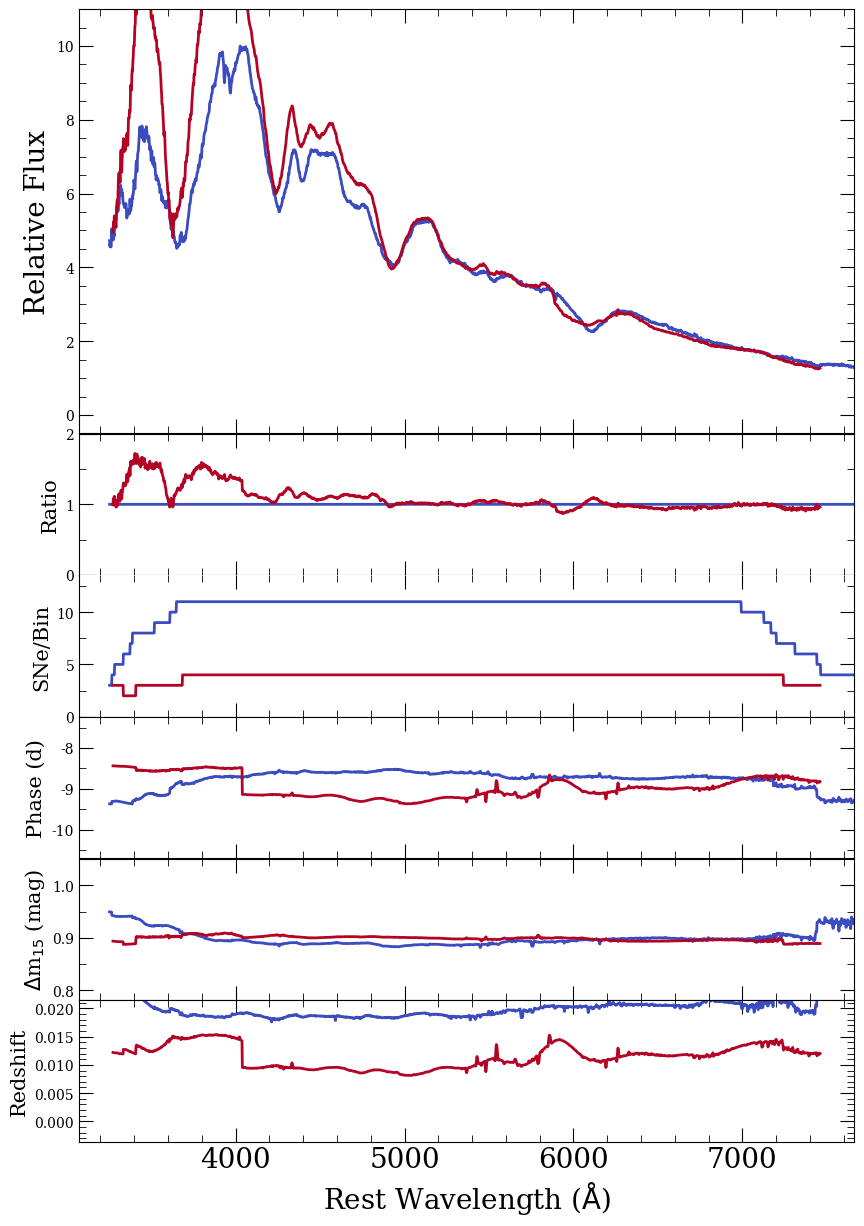

[ 3148.  3150.  3152. ... 10182. 10184. 10186.]
[ 3240.  3242.  3244. ... 10362. 10364. 10366.]
Phase:  -5.513918832342748
dm15:  0.9089213661145036
Redshift:  0.021770195765849685
HR:  0.08173277159709968
Phase:  -5.8504100794511755
dm15:  0.9231755549707761
Redshift:  0.011672319365656126
HR:  -0.02069563417978874


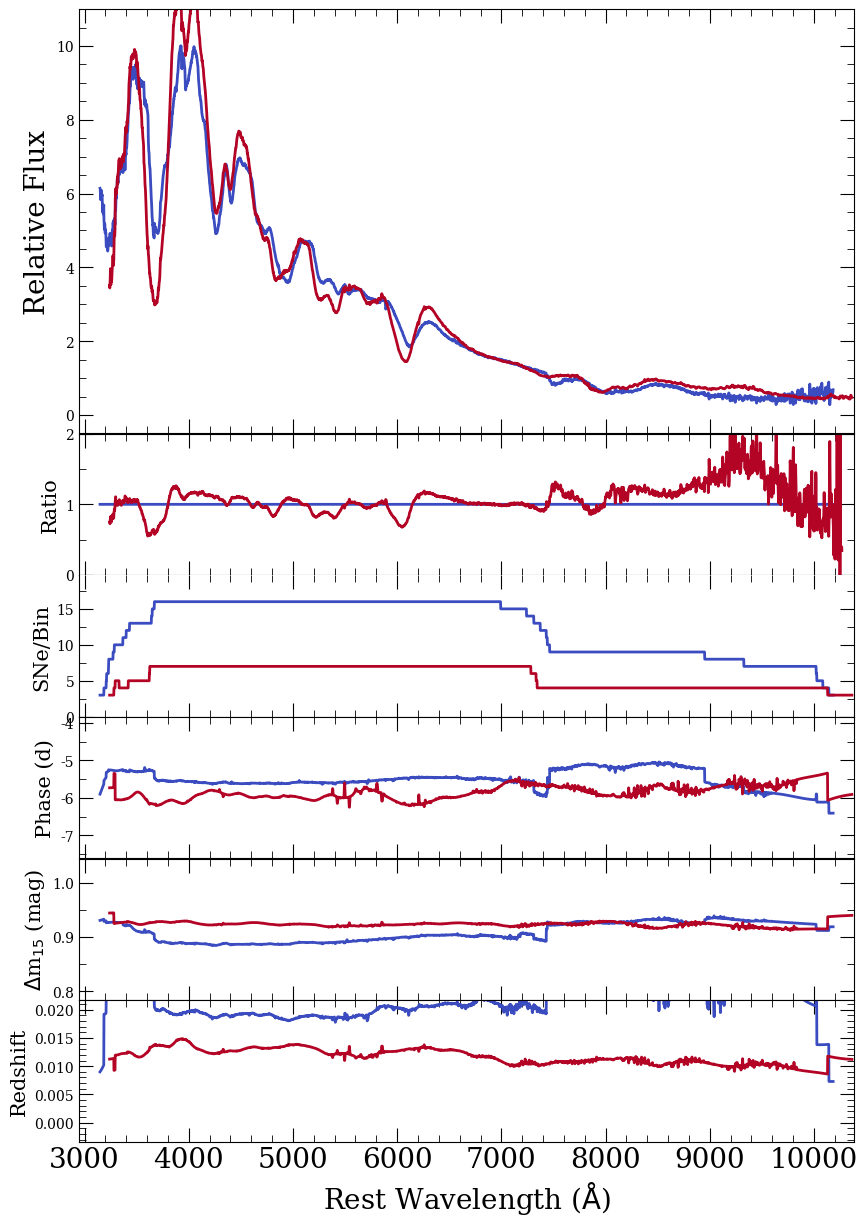

[3256. 3258. 3260. ... 9400. 9402. 9404.]
[]


IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
for i in range(1, len(composites_lowv)-1):
    comp_list = [composites_lowv[i], composites_highv[i]]
    valid_range = np.where(comp_list[1].spec_bin >= num)[0]
#     print comp_list[1].wavelength[valid_range]
    kpora.set_min_num_spec(comp_list, 3)
    kplot.comparison_plot(comp_list, scale_type=False, min_num_show=3)